## METODE SPECTRAL

Sebagian besar materi ini diadaptasi dari catatan kursus oleh [C. Bretherton](http://www.atmos.washington.edu/~breth/) atau buku Nick Trefethen yang berjudul ["Spectral Methods in MATLAB"](http://bookstore.siam.org/se10/).

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy
import numpy.fft as fft
import matplotlib.pyplot as plt

Misalkan $y_n$ dengan $n=1,\ldots,N$ adalah sebuah deret dengan nilai $N$ yang mungkin merupakan nilai yang kompleks.  Transformasi Fourier diskrit (DFT) dari deret ini adalah deret $Y_m$ dengan $m=1,\ldots, N$ di mana
$$
    Y_m = \sum^N_{n=1} y_n e^{-2 \pi i(m - 1)(n - 1) / N}
$$
dan dengan Inverse transform 
$$
    y_n = \frac{1}{N} \sum^N_{m=1} Y_m e^{2 \pi i (m - 1) (n - 1) / N}.
$$
Penggunaan DFT berkisar dari diferensiasi numerik yang sangat akurat (secara spektral) hingga analisis deret waktu, penyaringan, dan kuadratur.  


## Discrete Fourier Transform
Misalkan $y_n$ dengan $n=1,\ldots,N$ adalah sebuah deret dengan nilai $N$ yang mungkin merupakan nilai yang kompleks.  Transformasi Fourier diskrit (DFT) dari deret ini adalah deret $Y_m$ dengan $m=1,\ldots, N$ di mana
$$
    Y_m = \sum^N_{n=1} y_n e^{-2 \pi i(m - 1)(n - 1) / N}
$$
dan dengan inverse tranform 
$$
    y_n = \frac{1}{N} \sum^N_{m=1} Y_m e^{2 \pi i (m - 1) (n - 1) / N}.
$$
Penggunaan DFT berkisar dari diferensiasi numerik yang sangat akurat (secara spektral) hingga analisis deret waktu, penyaringan, dan kuadratur. 

Penggunaan langsung rumus-rumus ini akan membutuhkan operasi $\mathcal{O}(N^2)$ untuk melakukan transform.  Namun, jika $N = 2^k$ untuk beberapa $k \in \mathbb{Z^+}$ salah satu keajaiban komputasi modern, Fast Fourier Transform  (FFT) dapat digunakan dengan hanya memerlukan operasi $\mathcal{O}(N \log N)$ sebagai gantinya.  Hal ini dapat digeneralisasi (dengan membagi domain ke dalam jumlah titik yang sesuai) tanpa kehilangan kecepatan secara umum.  Karena keberadaan FFT di mana-mana, kebanyakan orang akan menggunakan FFT sebagai pengganti DFT ketika menjelaskan pendekatan.

### Hubungan dengan Analisis Fourier

Salah satu perspektif yang dapat kita ambil untuk merumuskan metode spektral adalah perspektif di mana kita ingin merekonstruksi/mendekonstruksi fungsi periodik $y(x)$ dari beberapa panjang gelombang $L$, berdasarkan nilai-nilainya pada himpunan diskrit $N$ titik-titik dengan jarak yang sama
$$
    x_n = \frac{(n-1) L}{N}.
$$

Pertimbangkan koefisien Fourier dari fungsi $y(x)$,
$$
    \hat{y~}_m = \frac{1}{L} \int^L_0 y(x) \exp(-i k(m) x) dx, \quad m = 0, \pm 1, \pm 2, \ldots
$$
di mana bilangan gelombang yang terkait dengan koefisien Fourier $m$ adalah
$$
    k(m) = \frac{2 \pi m}{L}.
$$
Dari koefisien-koefisien ini kita dapat merekonstruksi fungsi $y(x)$ sebagai
$$
    y(x) = \sum^\infty_{m=-\infty} \hat{y~}_m \exp(i k(m) x).
$$

Ingatlah bahwa kita tahu bahwa koefisien $\hat{y~}_m \rightarrow 0$ sebagai $m \rightarrow \infty$.  Khususnya jika $y(x) \in C^R$ di seluruh interval $[0, L]$ maka koefisien-koefisien Fourier meluruh sebagai $\mathcal{O}(|m|^{-(R + 1)})$.

Untuk menghubungkan koefisien DFT $Y_m$ dan koefisien Fourier $\hat{y~}_m$ kita dapat mengestimasi integral di atas melalui penjumlahan Riemann untuk menemukan
$$\begin{aligned}
    \hat{y~}_m & \approx \frac{1}{L} \sum^N_{n=1} y(x_n) \exp\left(-i k(m) x_n \right) \Delta x\\
    &= \frac{1}{N} \sum^N_{n=1} y(x_n) \exp\left[-i \frac{2 \pi m}{L} \frac{(n - 1) L}{N} \right] \\
    &= \frac{Y_m}{N}
\end{aligned}$$

Sekarang untuk merekonstruksi perkiraan sepenuhnya, kita ambil $m = 1,2,\ldots,N$ dan urutan koefisien Fourier
$$
    M_m = 0, 1, 2, \ titik-titik, N / 2 - 1, - N / 2, \ titik-titik, -1,
$$
dan urutan wavenumber yang sesuai 
$$
    k_m = k(M_m) = \frac{2 \pi M_m}{L}
$$ 
untuk menemukan
$$ \begin{aligned}
    \hat{y~}_M & \approx \frac{Y_m}{N} \\
    y(x) &\approx y_N(x) = \sum^{N/2 - 1}_{M=-N/2} \frac{Y_m}{N} \exp(i k(M) x) = \sum^{N}_{m=1} \frac{Y_m}{N} \exp(i k_m x)
\end{aligned}$$

Untuk contoh di bawah ini, amati seberapa cepat koefisien FFT turun untuk berbagai jenis fungsi.
1. Gelombang persegi, $C^0$ dengan koefisien yang jatuh sebagai $\mathcal{O}(|M|^{-1})$. Tepatnya $\hat{y~}_M = -2 i / (\pi M), M$ ganjil.
1. Gelombang gigi gergaji, $C^1$ dengan koefisien jatuh sebagai $\mathcal{O}(|M|^{-2})$. Tepatnya $\hat{y~}_M = 2 / (\pi M)^2, M$ ganjil.
1. Fungsi $(1-0.6 \cos(2 \pi x / L))^{-1}$, $C^\infty$ dengan koefisien yang jatuh *spektral* (di luar orde aljabar).  Tepatnya $\hat{y~}_M = 1,25 \cdot 3^{-|M|}$.

<>:39: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2688\2660554121.py:39: SyntaxWarning: invalid escape sequence '\h'
  axes.set_ylabel("$\hat{y}$ and $Y_N$")


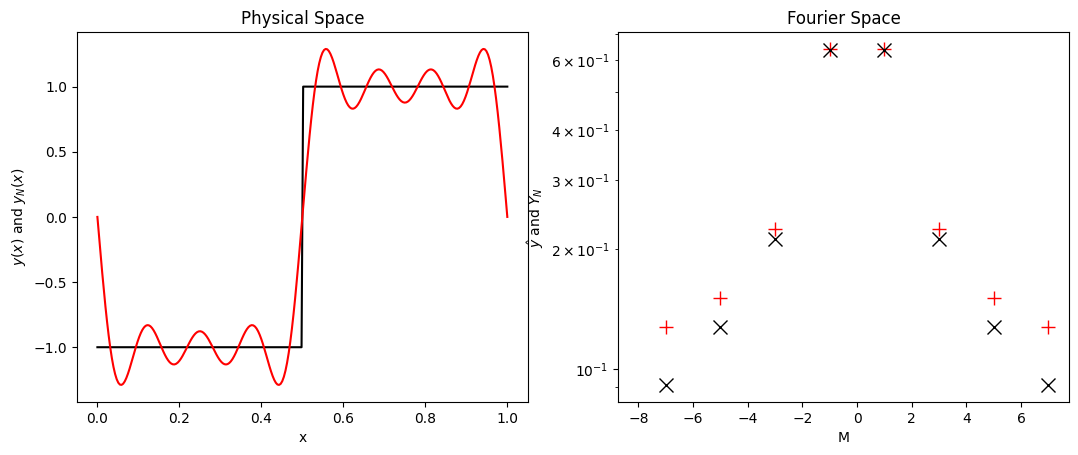

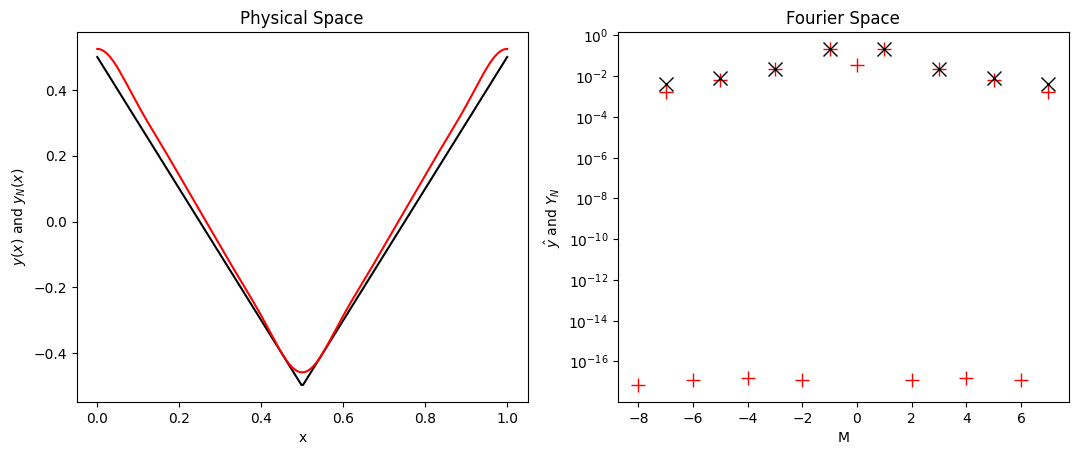

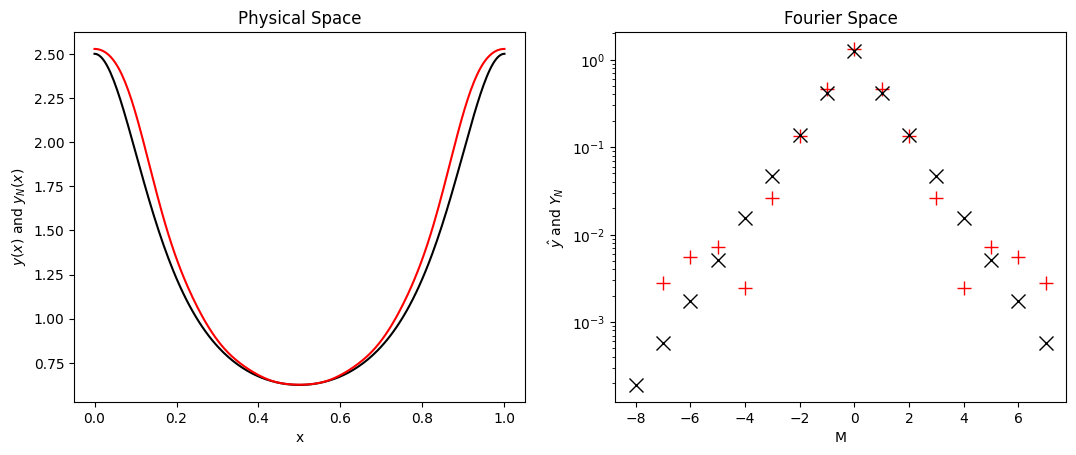

In [3]:
L = 1.0
N = 2**4
x = numpy.linspace(0.0, L, N)
delta_x = L / N
x_fine = numpy.linspace(0.0, L, 2**8)
M = fft.fftfreq(N, 1.0 / N)
M_odd = M[numpy.nonzero(numpy.ravel(numpy.mod(M, 2)))]
k = 2.0 * numpy.pi * M / L

y = [lambda x: numpy.sign(x - 0.5),
     lambda x: numpy.abs(2.0 * x - 1.0) - 0.5,
     lambda x: 1.0 / (1.0 - 0.6 * numpy.cos(2.0 * numpy.pi / L * x))]
y_hat = [lambda M:-2.0j / (numpy.pi * M),
         lambda M:2.0 / (numpy.pi * M)**2,
         lambda M:1.25 * 3.0**(-numpy.abs(M))]
    
for (i, y) in enumerate(y):
    Y = fft.fft(y(x))
    y_inv = numpy.zeros(x_fine.shape[0])
    for m in range(N):
        y_inv += ((Y[m] / N) * numpy.exp(1.0j * k[m] * (x_fine - 1.0 / (2.0 * N)))).real

    fig = plt.figure()
    fig.set_figwidth(fig.get_figwidth() * 2)
    axes = fig.add_subplot(1, 2, 1)
    axes.plot(x_fine, y(x_fine), 'k')
    axes.plot(x_fine, y_inv,'r')
    axes.set_xlabel("x")
    axes.set_ylabel("$y(x)$ and $y_N(x)$")
    axes.set_title("Physical Space")

    axes = fig.add_subplot(1, 2, 2)
    axes.semilogy(M, numpy.abs(Y) / N, '+r', markersize=10)
    if i != 2:
        axes.semilogy(M_odd, numpy.abs(y_hat[i](M_odd)) , 'xk', markersize=10)
    else:
        axes.semilogy(M, numpy.abs((y_hat[i](M))), 'xk', markersize=10)
    axes.set_xlabel("M")
    axes.set_ylabel("$\hat{y}$ and $Y_N$")
    axes.set_title("Fourier Space")

plt.show()

Secara praktis, kita dapat mengatakan bahwa semakin halus suatu fungsi, semakin sedikit koefisien Fourier yang perlu kita miliki agar kita dapat memperkirakan fungsi $y(x)$.

### Sifat-sifat DFT

Misalkan $\mathbf{y}$ adalah vektor nilai titik grid $y_i$, DFT dan invers DFT dapat dituliskan sebagai operator matriks
$$
    \mathbf{Y} = DFT(\mathbf{y}) = N^{1/2} \mathbf{F} \mathbf{y} \\
    \mathbf{y} = DFT^{-1}(\mathbf{Y}) = N^{1/2} \mathbf{F}^\ast \mathbf{Y}.
$$
Di sini $\mathbf{Y}$ adalah DFT dari $\mathbf{y}$,
$$
    F_{mn} = N^{-1/2} \exp(-2 \pi i (m - 1)(n - 1)),
$$
dan $\mathbf{F}^\ast$ adalah transpose konjugat dari $\mathbf{F}$.

Dari sini kita juga dapat memperoleh identitas *Parseval* untuk transformasi diskrit
$$\begin{aligned}
    \sum^N_{m=1} \frac{|Y^2_m|}{N} &= \frac{\mathbf{Y}^\ast \mathbf{Y}}{N} \\
    &= \mathbf{y}^\ast \mathbf{F}^\ast \mathbf{F} \mathbf{y} \\
    &= \mathbf{y}^\ast \mathbf{y} \\
    &= \sum^N_{n=1} |y^2_n|
\end{aligned}$$
dengan menggunakan fakta bahwa $\mathbf{F}$ yaitu $\mathbf{F}$ adalah matrix kesatuan. $\mathbf{F}^\ast \mathbf{F} = \mathbf{F} \mathbf{F}^\ast = \mathbf{I}$.

DFT juga mematuhi teorema convolution sehingga
$$
    DFT (w \ast y) = W_m Y_m
$$
dimana
$$
    (w \ast y)_n = \sum^N_{p=1} w_p y_{n-p}
$$
adalah konvolusi dari $w$ dan $y$.

**Teorema** Kehalusan suatu fungsi dan peluruhan koefisien Fouriernya.

Misalkan $u \in L^2(\mathbb R)$ memiliki sebuah transformasi Fourier $\hat{u}$, maka
1. Jika $u$ memiliki turunan kontinu $p-1$ dalam $L^2(\mathbb R)$ untuk beberapa $p \geq 0$ dan turunan ke-p dari variasi yang terbatas maka
$$
    \hat{u~}(k) = \mathcal{O}(|k|^{-p-1} ) \quad \text{as} \quad |k| \rightarrow \infty.
$$
1. Jika $u$ memiliki tak hingga banyak turunan kontinu dalam $L^2(\mathbb R)$ maka
$$
    \hat{u~}(k) = \mathcal{O}(|k|^{-m} ) \quad \text{as} \quad |k| \rightarrow \infty
$$
untuk setiap $m \geq 0$, ini juga dikenal sebagai konvergensi *spektral*.  Kebalikannya juga berlaku.
1. Jika ada sebuah $a, c > 0$ sedemikian rupa sehingga $u$ dapat diperluas menjadi sebuah fungsi analitik dalam barisan kompleks $\\Im(z)| < a$ dengan $\\ u(\cdot + i y) \\\leq c$ secara seragam untuk semua $y \in (-a, a)$, di mana $\| u(\cdot + i y) \|$ adalah norma $L^2$ di sepanjang garis horisontal $\Im(z) = y$, maka $u_a(k) \in L^2(\mathbb R)$, di mana $u_a(k) = e^{a |k|} \hat{u}(k)$.  Kebalikannya juga berlaku.
1. Jika $u$ dapat diperluas ke seluruh fungsi (yaitu analitik di seluruh bidang kompleks) dan ada $a > 0$ sehingga $|u(z)| = \mathcal{O}(e^{a|z|})$ sebagai $z \rightarrow \infty$ untuk seluruh nilai kompleks $z \in \mathbb C$, maka $\hat{u}$ memiliki dukungan kompak yang terkandung di dalam $[-a, a]$.  Kebalikannya juga berlaku

### Diferentiation

Ingatlah bahwa transformasi Fourier dari suatu turunan mengubah turunan tersebut menjadi ekspresi aljabar:
$$
    \widehat{(u_x)} = i \xi \hat{u~}.
$$
Kita juga dapat memanfaatkan hal ini dalam kasus diskrit.

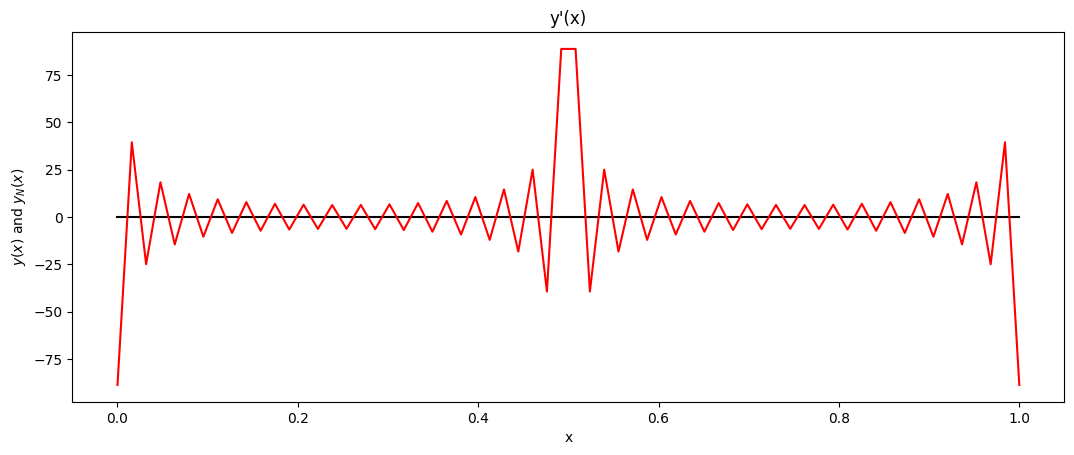

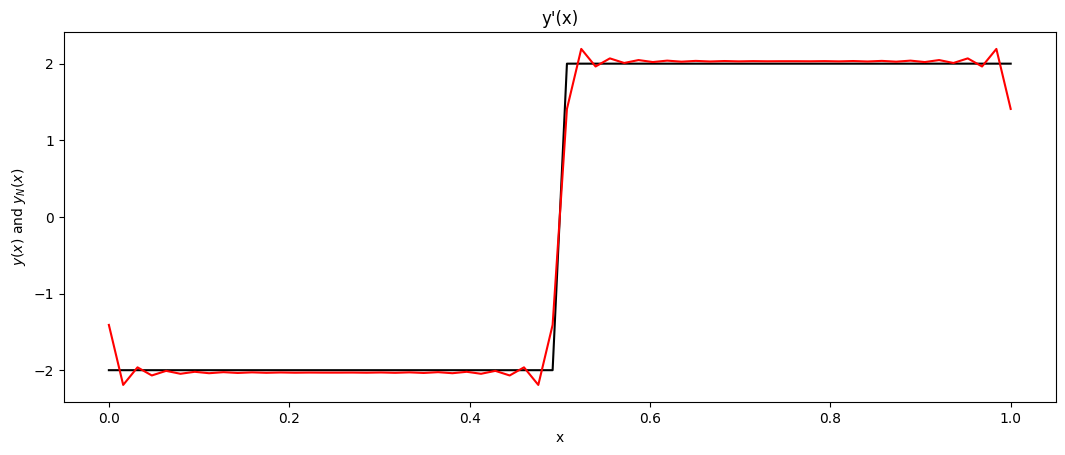

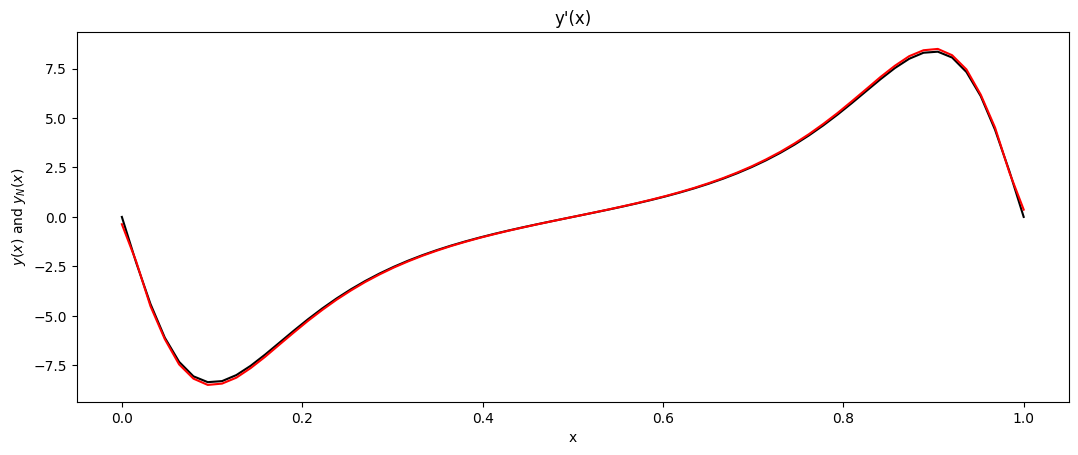

In [4]:
L = 1.0
N = 2**6
x = numpy.linspace(0.0, L, N)
M = fft.fftfreq(N, 1.0 / N)
M_odd = M[numpy.nonzero(numpy.ravel(numpy.mod(M, 2)))]
k = 2.0 * numpy.pi * M / L

y_funcs = [lambda x: numpy.sign(x - 0.5),
           lambda x: numpy.abs(2.0 * x - 1.0) - 0.5,
           lambda x: 1.0 / (1.0 - 0.6 * numpy.cos(2.0 * numpy.pi / L * x))]
y_prime_funcs = [lambda x: numpy.zeros(x.shape[0]),
                 lambda x: 2.0 * numpy.sign(x - 0.5),
                 lambda x: -1.2 * numpy.pi / L * numpy.sin(2.0 * numpy.pi / L * x) / (1.0 - 0.6 * numpy.cos(2.0 * numpy.pi / L * x))**2]

for (i, y) in enumerate(y_funcs):
    Y = fft.fft(y(x))
    y_prime = fft.ifft(1.0j * k * Y).real

    fig = plt.figure()
    fig.set_figwidth(fig.get_figwidth() * 2)
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(x, y_prime_funcs[i](x), 'k')
    axes.plot(x, y_prime,'r')
    axes.set_xlabel("x")
    axes.set_ylabel("$y(x)$ and $y_N(x)$")
    axes.set_title("y'(x)")

plt.show()

Kita juga dapat menulis operasi ini sebagai operasi matriks (dengan asumsi fungsi periodik):
$$\begin{aligned}
    y'(x) \approx N^{-1/2} \mathbf{F}^\ast i \mathbf{K} \mathbf{Y} = N^{-1/2} \mathbf{F}^\ast i \mathbf{K} N^{1/2} \mathbf{F} \mathbf{y} = \mathbf{D} \mathbf{y}
\end{aligned}$$
di mana $D \equiv \mathbf{F}^\ast (i \mathbf{K}) \mathbf{F}$ adalah matriks diferensiasi pseudospektral Fourier*.  Matriks ini nyata, padat, anti-simetris, dan $N \times N$.  Matriks $\mathbf{K} \equiv diag(\mathbf{k})$.

Selain itu, karena $\mathbf{F}$ adalah kesatuan, kita dapat membuat beberapa turunan hanya dengan menerapkan matriks beberapa kali untuk menemukan turunan ke-p.
$$
    D^p = (\mathbf{F}^\ast i \mathbf{K} \mathbf{F})^p = \mathbf{F}^\ast (i \mathbf{K})^p \mathbf{F}
$$

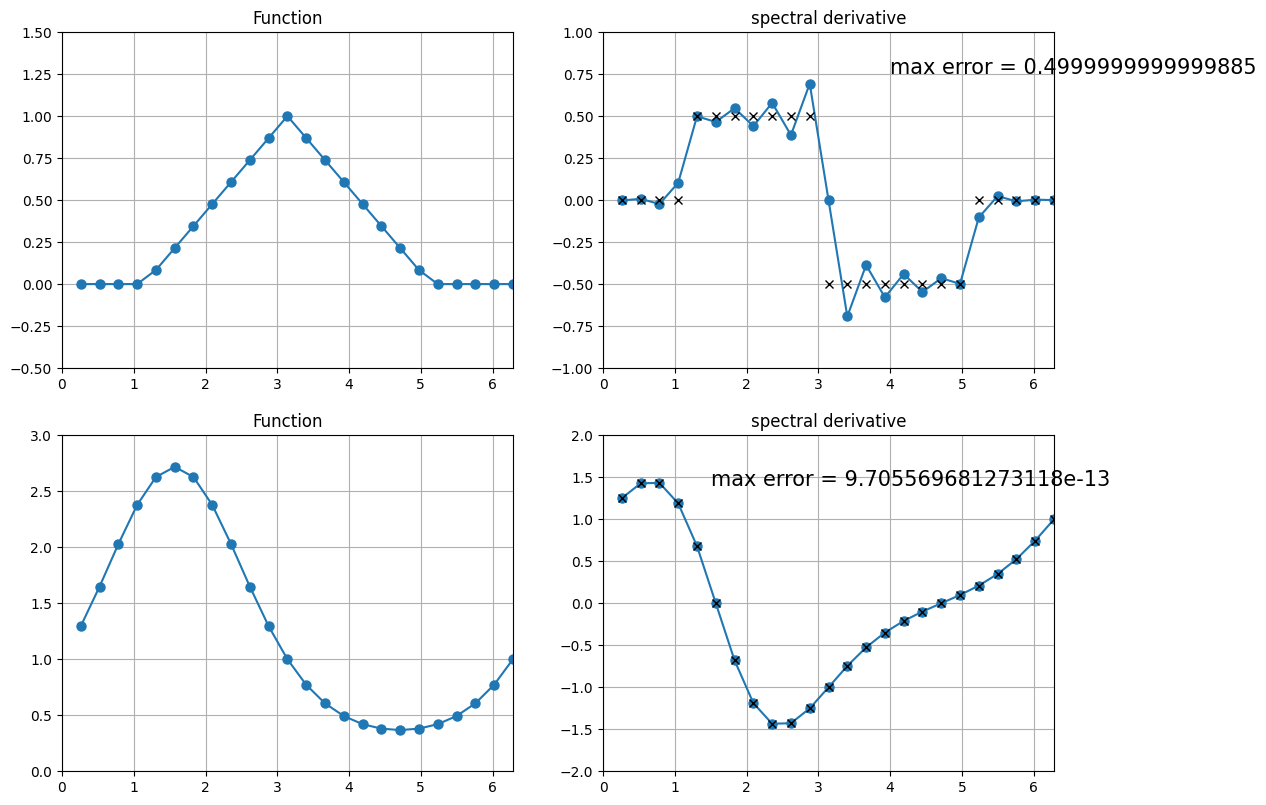

In [6]:
# Example Program 4 from Trefethen - Spectral Methods in MATLAB

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg

N = 24
delta_x = 2.0 * np.pi / N
x = np.linspace(delta_x, delta_x * N, N)

# Use differentiation matrix to perform derivatives
column = np.empty(N)
column[1:] = 0.5 * (-1.0) ** (np.arange(1, N)) / np.tan(np.arange(1, N) * delta_x / 2.0)
column[0] = 0.0
index_array = np.empty(N, dtype=int)
index_array[0] = 0
index_array[1:] = np.flipud(np.arange(1, N))
D = linalg.toeplitz(column, column[index_array])

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)

# Differentiation of a hat function
v = np.where(1 - np.abs(x - np.pi) / 2.0 > 0.0, 1 - np.abs(x - np.pi) / 2.0, 0.0)
v_prime =  np.ones(x.shape) * (1 - np.abs(x - np.pi) / 2.0 > 0.0) * (x < np.pi) * 0.5 + \
          -np.ones(x.shape) * (1 - np.abs(x - np.pi) / 2.0 > 0.0) * (x > np.pi) * 0.5
axes[0, 0].plot(x, v, '.-', markersize=13)
axes[0, 0].set_xlim((0, 2 * np.pi))
axes[0, 0].set_ylim((-0.5, 1.5))
axes[0, 0].set_title("Function")
axes[0, 0].grid(True)

axes[0, 1].plot(x, np.dot(D, v), '.-', markersize=13)
axes[0, 1].plot(x, v_prime, 'kx')
axes[0, 1].set_xlim((0, 2 * np.pi))
axes[0, 1].set_ylim((-1, 1))
axes[0, 1].set_title('spectral derivative')
axes[0, 1].grid(True)
error = np.linalg.norm(np.dot(D, v) - v_prime, ord=np.inf)
axes[0, 1].text(4.0, 0.75, "max error = %s" % error, fontsize=15)

# Differentiation of exp(sin(x))
v = np.exp(np.sin(x))
v_prime = np.cos(x) * v
axes[1, 0].plot(x, v, '.-', markersize=13)
axes[1, 0].set_xlim((0, 2 * np.pi))
axes[1, 0].set_ylim((0.0, 3.0))
axes[1, 0].set_title("Function")
axes[1, 0].grid(True)

axes[1, 1].plot(x, np.dot(D, v), '.-', markersize=13)
axes[1, 1].plot(x, v_prime, 'kx')
axes[1, 1].set_xlim((0, 2 * np.pi))
axes[1, 1].set_ylim((-2, 2))
axes[1, 1].set_title('spectral derivative')
axes[1, 1].grid(True)
error = np.linalg.norm(np.dot(D, v) - v_prime, ord=np.inf)
axes[1, 1].text(1.5, 1.4, "max error = %s" % error, fontsize=15)

plt.show()


### Metode Spektral

Kita juga dapat menerapkan pendekatan di atas jika kondisi batas periodik digunakan dan solusi yang diharapkan adalah solusi yang mulus.  Mari kita lihat hal ini melalui sebuah contoh.

Kita ingin menyelesaikan persamaan aveksi dengan kecepatan variabel
$$
    u_t + c(x) u_x = 0, \quad \Omega = [0, 2 \pi]
$$
dengan kondisi batas periodik dengan kondisi awal
$$
    u(x,0) = \exp(-100 (x - 1)^2)
$$
dan kecepatan variabel
$$
    c(x) = 1/5 + \sin^2(x - 1)
$$

Sekarang mari kita buat sebuah metode berdasarkan lompatan dan pendekatan diferensiasi di atas.  Perhatikan bahwa dalam metode perspektif garis kita akan memiliki
$$
    \frac{U^{n+1}_j - U^{n+1}_j}{2 \Delta t} = f(U^n) = -c(x_j) (D U^n)_j
$$
di mana di sini kita menggunakan matriks diferensiasi diferensiasi di atas sebagai pengganti selisih tengah.  Kita juga dapat menggunakan metode (yang lebih efisien) yang didasarkan pada mengetahui transformasi Fourier dari turunannya.  Perhatikan bahwa kita menggunakan perkiraan di sini untuk melakukan bootstrap pada metode ini.

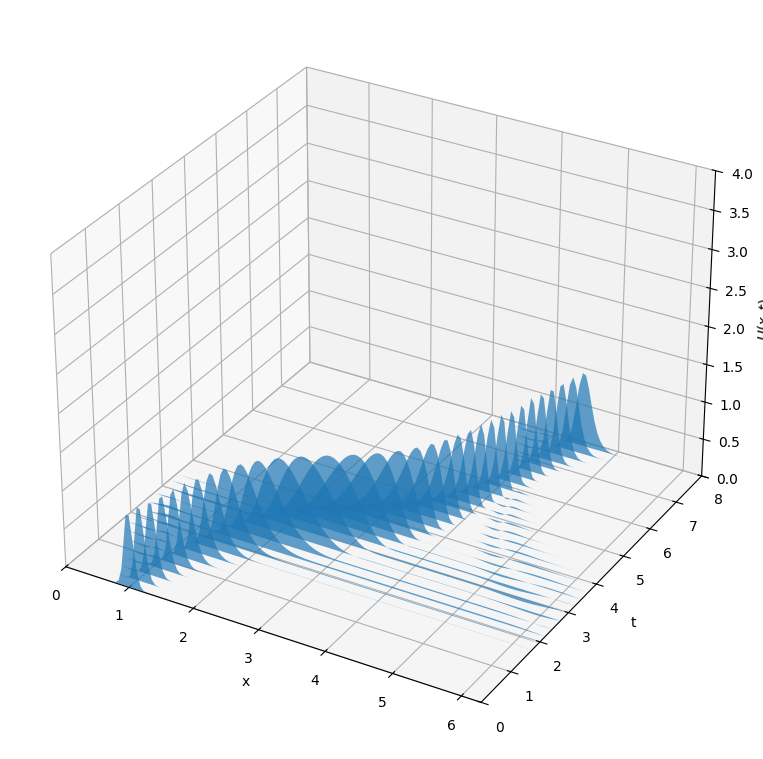

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.collections
import matplotlib.colors

# Compare a pseudo-spectral approach to a finite difference approach
# to the variable coefficient advection problem posed above

# Construct domain
N = 128
L = 2.0 * numpy.pi
delta_x = L / N
delta_t = delta_x / 4.0
x = numpy.linspace(delta_x, delta_x * N, N)
M = fft.fftfreq(N, 1.0 / N)
k = 2.0 * numpy.pi * M / L
c = 0.2 + numpy.sin(x - 1.0)**2

column = numpy.empty(N)
column[1:] = 0.5*(-1.0)**(numpy.arange(1, N)) * 1.0 / numpy.tan(numpy.arange(1, N) * delta_x / 2.0)
column[0] = 0.0
index_array = numpy.empty(N, dtype=int)
index_array[0] = 0
index_array[1:] = numpy.flipud(numpy.arange(1, N))
D = linalg.toeplitz(column, column[index_array])

U = numpy.exp(-100.0 * (x - 1.0)**2)
U_old = numpy.exp(-100.0 * (x - 0.2 * delta_t - 1.0)**2)
t_final = 8.0
num_steps = int(numpy.ceil(t_final / delta_t))
plot_interval = 20
t = 0.0
verts = []
t_output = []
for n in range(num_steps):
    # Direct discretization of derivative
#     U_hat = fft.fft(U)
#     U_prime_hat = 1.0j * k * U_hat
#     U_prime = fft.ifft(U_prime_hat).real
    # Differentiation matrix
    U_prime = numpy.dot(D, U)
    U_new = U_old - 2.0 * delta_t * c * U_prime
    U_old = U
    U = U_new

    t += delta_t
    if numpy.mod(n, plot_interval) == 0:
        t_output.append(t)
        verts.append(list(zip(x, U)))

cc = lambda arg:  matplotlib.colors.colorConverter.to_rgba(arg, alpha=0.6)
poly = matplotlib.collections.PolyCollection(verts)
poly.set_alpha(0.7)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
axes = fig.add_subplot(1, 1, 1, projection='3d')
axes.add_collection3d(poly, zs=t_output, zdir='y')
axes.set_xlabel("x")
axes.set_xlim3d(0.0, 2.0 * numpy.pi)
axes.set_ylabel("t")
axes.set_ylim3d(0.0, 8.0)
axes.set_zlabel("$U(x,t)$")
axes.set_zlim(0.0, 4)

plt.show()

## Penyelesaian Poisson Berbasis FFT

Kembali ke kuliah tentang metode iteratif untuk masalah Poisson, telah disebutkan secara singkat bahwa ada beberapa cara untuk menyelesaikan masalah Poisson berdasarkan FFT.  Di sini kita akan mengeksplorasi beberapa ide di balik metode-metode canggih ini.

Pertama-tama, pertimbangkan masalah Poisson satu dimensi yang didefinisikan sebagai
$$
    u_{xx} = f(x), \quad \Omega = [0, L]
$$
di mana $f(x)$ bersifat periodik dengan kondisi batas periodik.

Pertimbangkan solusi yang merupakan kombinasi linier dari basis Fourier terbatas
$$
    u(x) \approx \frac{1}{N} \sum^N_{n=1} U_n \exp(i k_n x)
$$
di mana kita memiliki
$$
    k_n = \frac{2 \pi}{L} \left\{ \begin{aligned} 
        n - 1, & & 1 \leq n \leq N/2 \\
        n - N - 1, & & N/2 + 1 \leq n \leq N.
    \end{aligned} \right .
$$

Sekarang perhatikan N titik-titik yang dikolokasi Fourier
$$
    x_j = \frac{(j-1) L}{N}, \quad j = 1, \ldots, N
$$
dan vektor-vektor yang bersesuaian $\mathbf{u} = [u(x_j)]_j$ dan $\mathbf{f} = [f(x_j)]_j$.  Dengan mengambil transformasi Fourier dari kedua sisi PDE asli, kita memiliki
$$\begin{aligned}
    (-i k_n)^2 \hat{u~}(k) &= \hat{f}(k) \\
    \hat{u~}(k) &= -\frac{\hat{f~}(k)}{k_n^2}.
\end{aligned}$$
Mengambil invers transformasi dari kedua sisi akan menghasilkan solusi.  Dalam kasus diskrit kita memiliki
$$
    \hat{\mathbf{f}~} = \text{DFT}(\mathbf{f}) \\
    U_n = -\frac{\hat{\mathbf{f}~}}{k_n^2} \\
    \mathbf{u} = \text{IDFT}\left(-\frac{\hat{\mathbf{f}~}}{k_n^2}\right). \\
$$

Satu masalah yang akan kita hadapi adalah $k_n = 0$ untuk $n = 1$.  Kita dapat mengasumsikan bahwa $F_1 = 0$ sehingga setidaknya kita dapat memperlakukan komponen ini secara unik (secara teknis Anda akan tetap memiliki $0/0$ tetapi ada beberapa cara untuk kasus ini).  Pertanyaannya adalah apakah kita harus benar-benar mengikuti cara ini.

Batasan bahwa $f_1 = 0$ sebenarnya adalah syarat untuk masalah Poisson yang baik pada domain periodik.  Komponen ini merepresentasikan nilai rata-rata dari fungsi $f(x)$ dan untungnya dapat dengan mudah dikurangkan dari fungsi tersebut.  Pada kenyataannya, sistem yang ada juga tidak tertutup dalam hal ini dan ada banyak sekali solusi yang bervariasi berdasarkan nilai rata-rata (solusi ditentukan hingga konstanta aditif).  Di sini kita sebenarnya menetapkan bahwa kita mencari solusi di mana konstanta ini sama dengan nol.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2688\3847248502.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  U_hat[1:] = -F[1:] / k[1:]**2


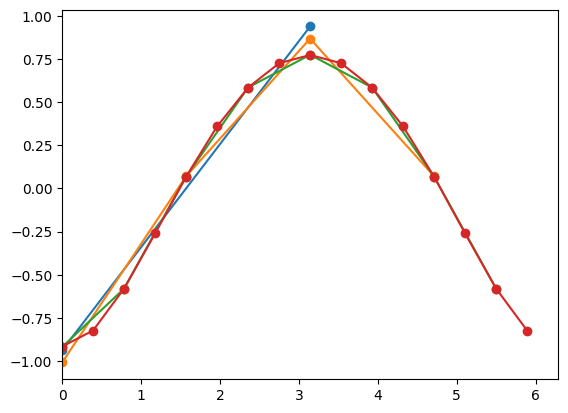

In [8]:
# Fourier spectral method for the Poisson problem
L = 2.0 * numpy.pi
f = lambda x: 1.0 / (1.0 - 0.6 * numpy.cos(2.0 * numpy.pi * x / L))

fig, axes = plt.subplots(1, 1)
for N in [2, 4, 8, 16]:
    delta_x = L / N
    delta_t = delta_x / 4.0
    x = numpy.linspace(0.0, delta_x * (N - 1), N)
    
    # Use the fft
    M = fft.fftfreq(N, 1.0 / N)
    k = 2.0 * numpy.pi * M / L

    F = fft.fft(f(x))
    if F[0] != 0:
        F = fft.fft(f(x) - F[0])
    U_hat = numpy.empty(N)
    U_hat[0] = 0.0
    U_hat[1:] = -F[1:] / k[1:]**2
    U = fft.ifft(U_hat).real

    axes.plot(x, U, 'o-')
    axes.set_xlim(0.0, L)

## Metode Spektral Chebyshev

Jadi, apa yang terjadi jika kita tidak berada pada domain periodik?  Kita dapat berpikir untuk menggunakan polinomial daripada polinomial triginometri (basis Fourier kita).  Namun, dari interpolasi kita tahu bahwa menggunakan titik-titik dengan jarak yang sama adalah ide yang buruk.  

Sebagai gantinya, kita akan mendistribusikan titik-titik interpolasi sedemikian rupa sehingga
$$
    x_j = \cos\left(\frac{j \pi}{N} \right), \quad j=0, 1, \ldots, N,
$$
disebut sebagai *titik Chebyshev* jenis kedua.

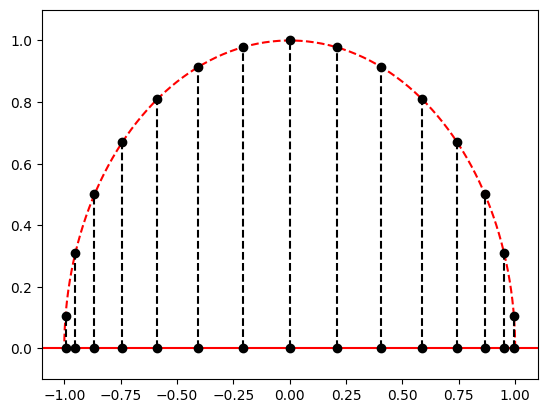

In [9]:
# Distribution of Chebyshev nodes
x = numpy.linspace(0, numpy.pi, 100)
N = 15

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(numpy.cos(x), numpy.sin(x), 'r--')
axes.plot(numpy.linspace(-1.1, 1.1, 100), numpy.zeros(x.shape), 'r')
for k in range(1, N + 1):
    location = [numpy.cos((2.0 * k - 1.0) * numpy.pi / (2.0 * N)),
                numpy.sin((2.0 * k - 1.0) * numpy.pi / (2.0 * N))]
    axes.plot(location[0], location[1], 'ko')
    axes.plot(location[0], 0.0, 'ko')
    axes.plot([location[0], location[0]], [0.0, location[1]], 'k--')
    
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-0.1, 1.1))
plt.show()

Dengan menggunakan basis Lagrange, kita dapat secara langsung melihat perbandingan penggunaan titik-titik yang berjarak sama dengan titik-titik Chebyshev.

True


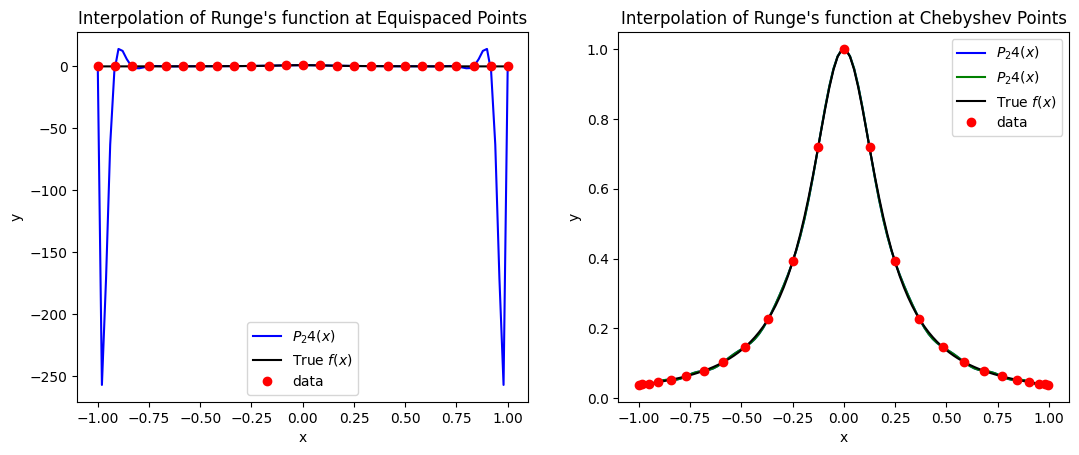

In [10]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Parameters
x = numpy.linspace(-1, 1, 100)
num_points = 25

# ============================================================
#  Equidistant nodes
equidistant_data = numpy.empty((num_points, 2))
equidistant_data[:, 0] = numpy.linspace(-1, 1, num_points)
equidistant_data[:, 1] = f(equidistant_data[:, 0])
N = equidistant_data.shape[0] - 1

lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in range(N + 1):
    for j in range(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - equidistant_data[j, 0]) / (equidistant_data[i, 0] - equidistant_data[j, 0])

# Calculate full polynomial
P_lagrange = numpy.zeros(x.shape[0])
for n in range(N + 1):
    P_lagrange += lagrange_basis[n, :] * equidistant_data[n, 1]

# ============================================================
#  Chebyshev nodes
chebyshev_data = numpy.empty((num_points, 2))
chebyshev_data[:, 0] = numpy.cos((2.0 * numpy.arange(1, num_points + 1) - 1.0) * numpy.pi / (2.0 * num_points))
chebyshev_data[:, 1] = f(chebyshev_data[:, 0])

# Create interpolant based on Chebyshev nodes
lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in range(N + 1):
    for j in range(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - chebyshev_data[j, 0]) / (chebyshev_data[i, 0] - chebyshev_data[j, 0])

# Calculate full polynomial
P_cheby1 = numpy.zeros(x.shape[0])
for n in range(N + 1):
    P_cheby1 += lagrange_basis[n, :] * chebyshev_data[n, 1]
    
# Fit directly with Chebyshev polynomials
coeff = numpy.polynomial.chebyshev.chebfit(chebyshev_data[:, 0], chebyshev_data[:, 1], N)
P_cheby2 = numpy.polynomial.chebyshev.chebval(x, coeff)

# Check on unique polynomials
print(numpy.allclose(P_cheby1, P_cheby2))

# ============================================================
# Plot the results
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(x, P_lagrange, 'b', label="$P_%s(x)$" % N)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(equidistant_data[:, 0], equidistant_data[:, 1], 'ro', label="data")
axes.set_title("Interpolation of Runge's function at Equispaced Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=8)

axes = fig.add_subplot(1, 2, 2)
axes.plot(x, P_cheby1, 'b', label="$P_%s(x)$" % N)
axes.plot(x, P_cheby2, 'g', label="$P_%s(x)$" % N)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(chebyshev_data[:, 0], chebyshev_data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Runge's function at Chebyshev Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)


plt.show()

Ada dua jenis simpul Chebyshev yang akan kita lihat sama-sama berfungsi sebagai titik interpolasi.

1. Simpul Chebyshev jenis pertama (akar)
$$
    x_k = \cos \left (\frac{(2 k - 1) \pi}{2 N} \right ) \quad k = 1, \ldots, N
$$
1. Node Chebyshev dari jenis ke-2 (ekstrema)
$$
    x_k = \cos \left( \frac{k \pi}{N} \right) \quad k = 0, \ldots, N
$$

[ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.        ]
[0.54030231 0.69021008 0.95263298 0.95263298 0.69021008 0.54030231]


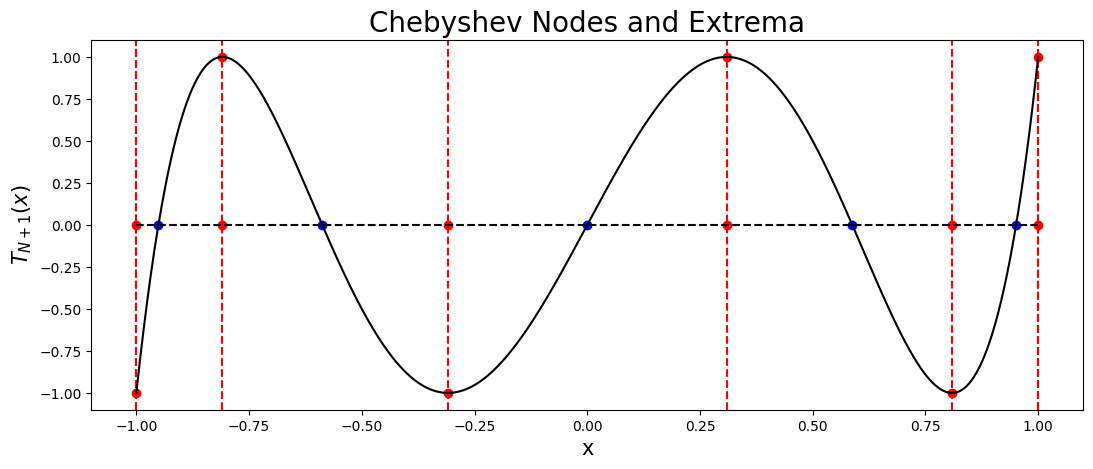

In [11]:
def cheb_poly(x, N):
    """Compute the *N*th Chebyshev polynomial and evaluate it at *x*"""
    T = numpy.empty((3, x.shape[0]))
    T[0, :] = numpy.ones(x.shape)
    T[1, :] = x
    for k in range(2, N):
        T[2, :] = 2.0 * x * T[1, :] - T[0, :]
        T[0, :] = T[1, :]
        T[1, :] = T[2, :]
    
    return T[2, :]

N = 5
x_extrema = numpy.cos(numpy.arange(N + 1) * numpy.pi / N)
x_nodes = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 1, 1)

# Plot points
axes.plot(x_extrema, numpy.zeros(N+1), 'ro')
axes.plot(x_nodes, numpy.zeros(N), 'bo')
    
# Plot some helpful lines
axes.plot((-1.0, -1.0), (-1.1, 1.1), 'k--')
axes.plot((1.0, 1.0), (-1.1, 1.1), 'k--')
axes.plot((-1.0, 1.0), (0.0, 0.0), 'k--')
for i in range(x_extrema.shape[0]):
    axes.plot((x_extrema[i], x_extrema[i]), (-1.1, 1.1), 'r--')
    axes.plot(x_extrema[i], cheb_poly(x_extrema, N + 1)[i], 'ro')

print(x_extrema)
print(numpy.cos(x_extrema))
    
# Plot Chebyshev polynomial
x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N + 1), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))

# Labels
axes.set_title("Chebyshev Nodes and Extrema", fontsize="20")
axes.set_xlabel("x", fontsize="15")
axes.set_ylabel("$T_{N+1}(x)$", fontsize="15")

plt.show()

Sifat menarik lainnya dari simpul Chebyshev adalah mereka bersarang dengan periode yang berbeda.  Node jenis pertama bersarang dengan faktor 3 sedangkan jenis kedua bersarang setiap 2.  Hal ini dapat berguna jika Anda telah menghabiskan waktu untuk mencari evaluasi fungsi pada kumpulan node dengan resolusi yang lebih rendah tetapi ingin meningkatkan jumlah titik yang digunakan.  Jika Anda menggunakan faktor penumpukan ini, Anda dapat mempertahankan lokasi node dan data Anda sambil tetap meningkatkan resolusi.

Text(0.5, 1.0, 'Chebyshev Nodes Second-Kind Nesting')

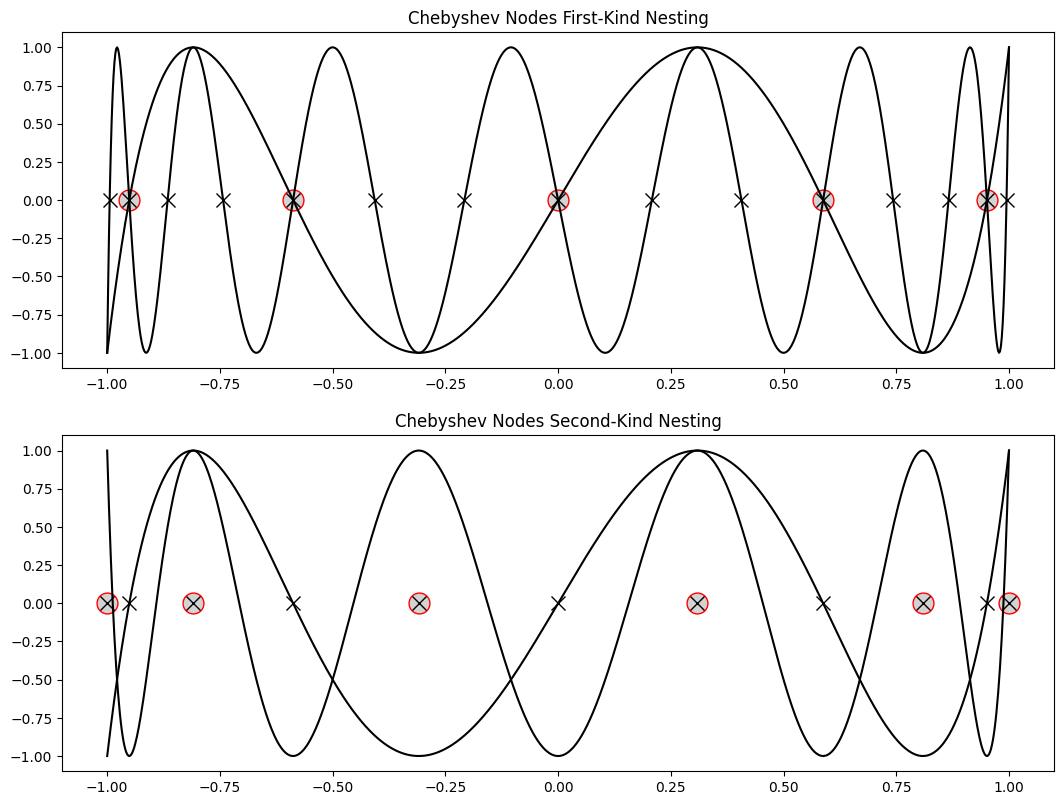

In [12]:
# First-kind Nesting (3 x)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
axes = fig.add_subplot(2, 1, 1)

N = 5
factor = 3
x_1 = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)
x_2 = numpy.cos((2.0 * numpy.arange(1, factor * N + 1) - 1.0) / (2.0 * factor * N) * numpy.pi)

axes.plot(x_1, numpy.zeros(N), "o", color="r", markerfacecolor="lightgray", markersize="15")
axes.plot(x_2, numpy.zeros(N * factor), 'kx', markersize="10")

x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N + 1), 'k')
axes.plot(x_hat, cheb_poly(x_hat, factor * N + 1), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.set_title("Chebyshev Nodes First-Kind Nesting")

# Second-kind Nesting (2 x)
axes = fig.add_subplot(2, 1, 2)
N = 5
factor = 2
x_1 = numpy.cos(numpy.arange(N + 1) * numpy.pi / N)
x_2 = numpy.cos(numpy.arange(factor * N + 1) * numpy.pi / (factor * N))

axes.plot(x_1, numpy.zeros(N + 1), "o", color="r", markerfacecolor="lightgray", markersize="15")
axes.plot(x_2, numpy.zeros(N * factor + 1), 'kx', markersize="10")

x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N + 1), 'k')
axes.plot(x_hat, cheb_poly(x_hat, factor * N + 1), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.set_title("Chebyshev Nodes Second-Kind Nesting")

Salah satu cara untuk mengukur optimalitas node Chebyshev sebagai sekumpulan titik interpolasi adalah dengan mempertimbangkan fungsi Lebesgue
$$
\lambda_N(x) = \sum_{i=0}^N \left| \ell_i(x) \right|
$$

di mana $\ell_i(x)$ adalah fungsi basis Lagrange untuk sekumpulan $x_i$ yang diberikan.  Maksimum dari fungsi Lebesgue disebut $\Lambda_n$ konstanta Lebesgue dan jelas terkait dengan interpolasi Lagrangian karena memberikan perkiraan pertama untuk kesalahan interpolasi.  Sayangnya, $\Lambda_N$ tidak dibatasi secara seragam terlepas dari node yang digunakan karena kita dapat menunjukkan bahwa 
$$
    \Lambda_N > \mathcal{O}(\log N) \quad \text{as} \quad N \rightarrow \infty
$$
Catatan $\Lambda_n$ adalah norma tak hingga dari operator linier yang memetakan data ke interpolasi pada kisi dan interval yang diberikan.

Jika kita menghitung fungsi-fungsi ini untuk titik-titik dengan jarak yang sama dan setiap jenis simpul Chebyshev, kita dapat melihat mengapa Chebyshev secara signifikan lebih baik dalam melakukan interpolasi.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2688\3289461655.py:42: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[i].set_ylim((0.0, y_max + 0.1))


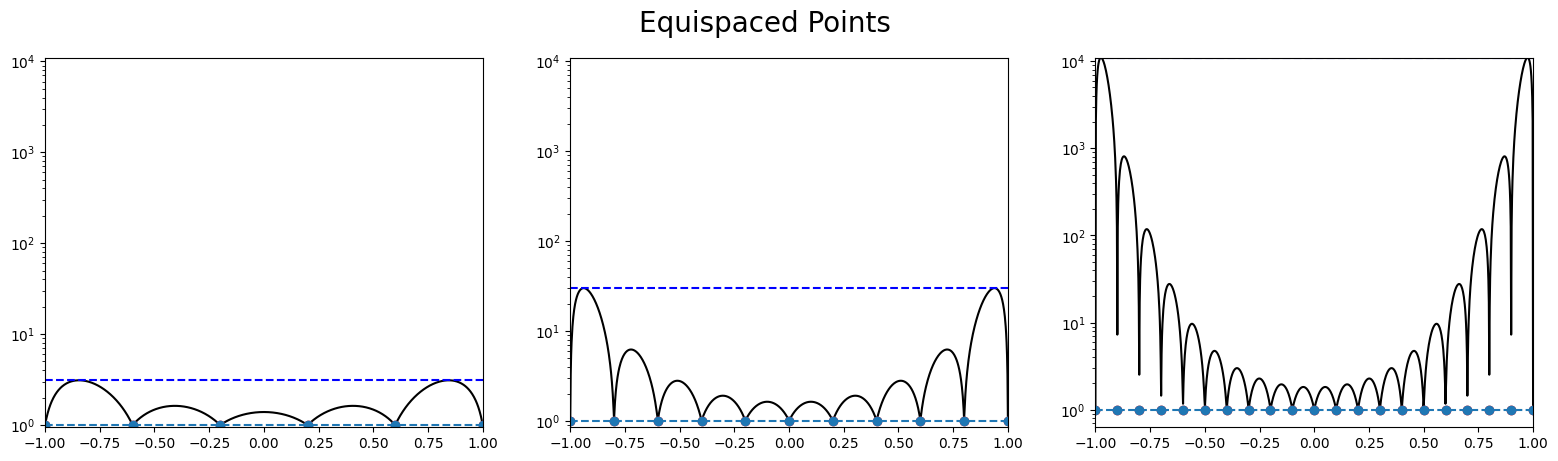

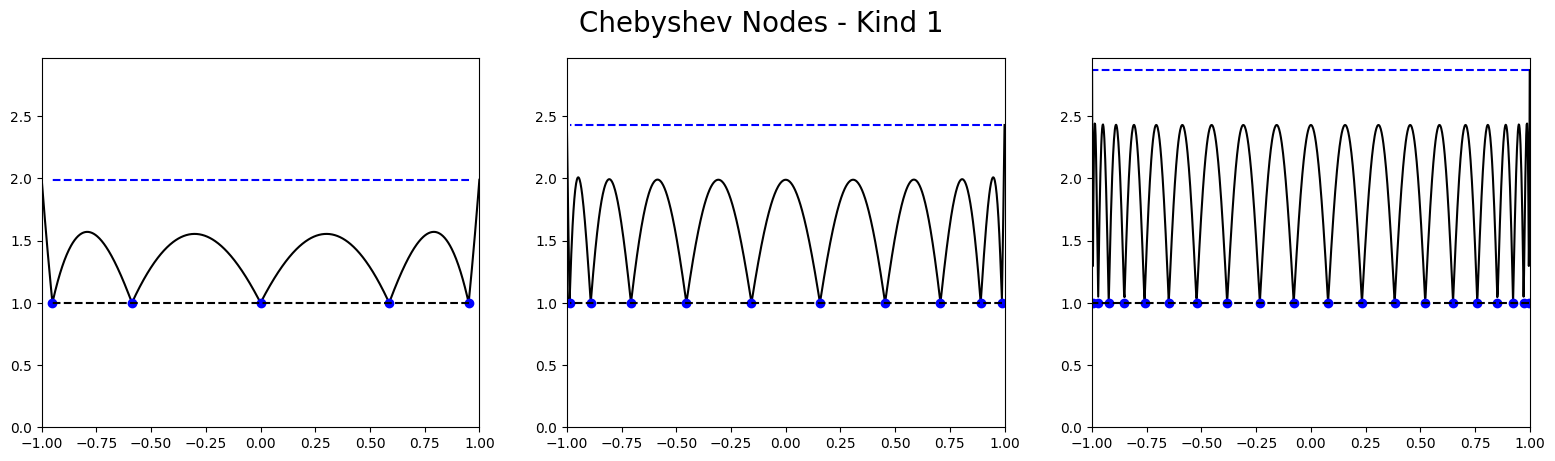

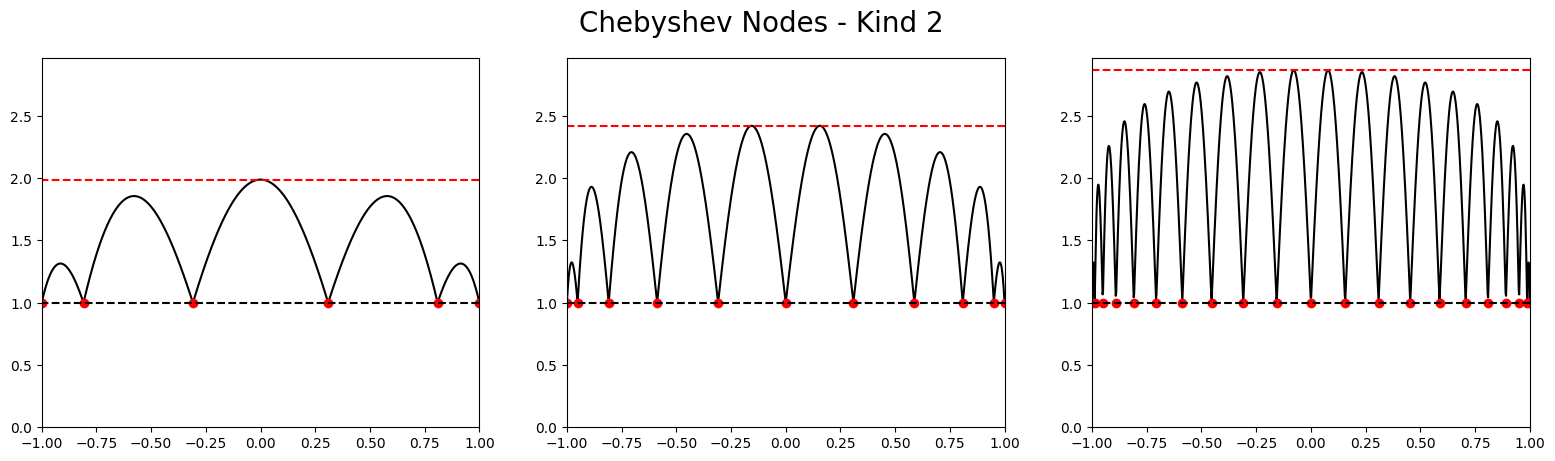

In [13]:
def lebesgue(x, data):
    """Compute the *i*th Lagrangian basis
    
    :Input:
     - *x* (numpy.ndarray) x values that basis will be evaluated at
     - *data* (numpy.ndarray) Tuples representing interpolant points
     - *i* (int) Which basis function to compute.
     
    :Output:
     - (numpy.ndarray) Contains the ith Lagrangian basis evaluated at x
    """
    
    lebesgue = numpy.zeros(x.shape[0])
    for i in range(data.shape[0]):
        lagrange_basis = numpy.ones(x.shape[0])
        for j in range(data.shape[0]):
            if i != j:
                lagrange_basis *= (x - data[j]) / (data[i] - data[j])
        lebesgue += numpy.abs(lagrange_basis)
    return lebesgue

N_range = [5, 10, 20]
x = numpy.linspace(-1, 1, 1000)

# Equispaced
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.suptitle("Equispaced Points", fontsize="20")
y_max = 0.0
axes = []
for (i, N) in enumerate([5, 10, 20]):
    x_hat = -1.0 + 2.0 * numpy.arange(N + 1) / N
    y = lebesgue(x, x_hat)
    axes.append(fig.add_subplot(1, 3, i + 1))
    axes[i].semilogy(x, y, 'k')
    axes[i].semilogy(x_hat, numpy.ones(N + 1), 'ro')
    axes[i].semilogy(x_hat, numpy.ones(N + 1), 'o--')
    axes[i].plot(x_hat, numpy.ones(N + 1) * numpy.max(y), 'b--')
    axes[i].set_xlim((-1, 1))
    y_max = max(y_max, numpy.max(y))
for i in range(len(N_range)):
    axes[i].set_ylim((0.0, y_max + 0.1))

# Chebysehv Nodes
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.suptitle("Chebyshev Nodes - Kind 1", fontsize="20")
y_max = 0.0
axes = []
for (i, N) in enumerate(N_range):
    x_hat = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)
    y = lebesgue(x, x_hat)
    axes.append(fig.add_subplot(1, 3, i + 1))
    axes[i].plot(x, y, 'k')
    axes[i].plot(x_hat, numpy.ones(N), 'bo')
    axes[i].plot(x_hat, numpy.ones(N), 'k--')
    axes[i].plot(x_hat, numpy.ones(N) * numpy.max(y), 'b--')
    axes[i].set_xlim((-1, 1))
    y_max = max(y_max, numpy.max(y))
for i in range(len(N_range)):
    axes[i].set_ylim((0.0, y_max + 0.1))
    
# Chebyshev extrema - note that the maxima are the same
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.suptitle("Chebyshev Nodes - Kind 2", fontsize="20")
y_max = 0.0
axes = []
for (i, N) in enumerate(N_range):
    x_hat = numpy.cos(numpy.arange(N + 1) * numpy.pi / N)
    y = lebesgue(x, x_hat)
    axes.append(fig.add_subplot(1, 3, i + 1))
    axes[i].plot(x, y, 'k')
    axes[i].plot(x_hat, numpy.ones(N + 1), 'ro')
    axes[i].plot(x_hat, numpy.ones(N + 1), 'k--')
    axes[i].plot(x_hat, numpy.ones(N + 1) * numpy.max(y), 'r--')
    axes[i].set_xlim((-1, 1))
    y_max = max(y_max, numpy.max(y))
for i in range(len(N_range)):
    axes[i].set_ylim((0.0, y_max + 0.1))

Untuk benar-benar menunjukkan bahwa simpul-simpul Chebyshev adalah optimal, pertimbangkan polinomial monik $p(z)$ dalam bidang kompleks berderajat $N$
$$
    p(z) = \prod^N_{k=1} (z - z_k)
$$
di mana $z_k$ adalah akar-akar dengan kemungkinan multiplisitas yang tidak sepele.  Dengan sedikit memanipulasi hal ini, kita juga dapat menulis ekspresi terkait
$$\begin{aligned}
    |p(z)| &= \prod^N_{k=1} |z - z_k| \\
    \log|p(z)| &= \sum^N_{k=1} \log|z - z_k|.
\end{aligned}$$

Misalkan 
$$
    \phi_N(z) = \frac{1}{N} \sum^N_{k=1} \log |z - z_k|,
$$
Karena $\phi_N(z)$ adalah *harmonik*, maka persamaan ini memenuhi persamaan Laplace pada bidang kompleks kecuali pada akar-akar $z_k$.  Pengaturan ini dapat dilihat sebagai potensial elektrostatik dengan muatan pada akar $z_k$.  Potensial dari masing-masing muatan adalah
$$
    \frac{\log |z - z_k|}{N}.
$$

Perhatikan sekarang hubungan antara $|p(z)|$ dan $\phi_N(z)$.  Dari ekspresi kita sebelumnya, kita tahu bahwa
$$
    |p(z)| = e^{N \phi_N(z)}.
$$

Jika $\phi_N(z)$ secara kasar konstan pada interval $[-1, 1]$ maka $|p(z)|$ juga konstan.  Sebaliknya, jika $\phi_N(z)$ bervariasi maka variasi dari $|p(z)|$ akan menjadi eksponensial, terutama untuk $N$ yang besar!  Dengan memperhatikan perilaku ini, pertimbangkan batas $N \rightarrow \infty$ dan pertimbangkan titik-titik $x_j$ yang terdistribusi dalam $[-1, 1]$ menurut fungsi densitas $\rho(x)$ dengan
$$
    \int^1_{-1} \rho(x) dx = 1.
$$

Dari fungsi kepadatan ini kita juga mengetahui jumlah titik kisi dalam sebuah interval $[a, b]$ sebagai
$$
    1 = N \int^b_a \rho(x) dx.
$$

Dengan menggunakan kerangka kerja ini, kita dapat menulis potensi sebagai
$$
    \phi(z) = \int^1_{-1} \rho(x) \log |z - x| dx.
$$
Dalam batas $N \rightarrow \infty$ kita dapat menunjukkan untuk titik-titik yang berjarak sama bahwa
$$
    \phi(z) = -1 +\frac{1}{2} \Re((z + 1) \log(z + 1) - (z-1)\log(z-1)).
$$
Perhatikan bahwa $\phi(0) = -1$ dan $\phi(\pm 1) = -1 + \log 2$ yang mengimplikasikan bahwa jika sebuah polinomial $p$ memiliki akar-akar yang berjarak sama pada $[-1, 1], maka ia akan mengambil nilai $2^N$ lebih besar di sekitar titik $\pm 1$ daripada di sekitar $0$.

Sebaliknya, jika kita mempertimbangkan distribusi untuk titik-titik Chebyshev
$$
 \rho(x) = \frac{1}{\pi \sqrt{1 - x^2}}, \quad x\in[-1,1]
$$
kita dapat menunjukkan bahwa potensi yang dihasilkan adalah
$$
 \phi(z) = \log\frac{\left|z - \sqrt{z^2 - 1} \right |}{2}.
$$

Yang menarik dari rumus ini adalah interpretasi yang sederhana, kurva level dari $\phi(z)$ adalah elips dengan fokus $\pm 1$.  Nilai $\phi(z)$ di sepanjang elips tersebut adalah logaritma dari setengah jumlah sumbu semimayor dan minor elips.  Elips yang merosot $[-1, 1]$ juga merupakan kurva level dan memiliki nilai konstan $-\log 2$.  Hal ini menjadi optimal dengan polinomial yang tumbuh sebagai
$$
    |p(z)| = e^{N \phi(x)} \approx 2^{-N}, ~~~ x\in[-1,1].
$$

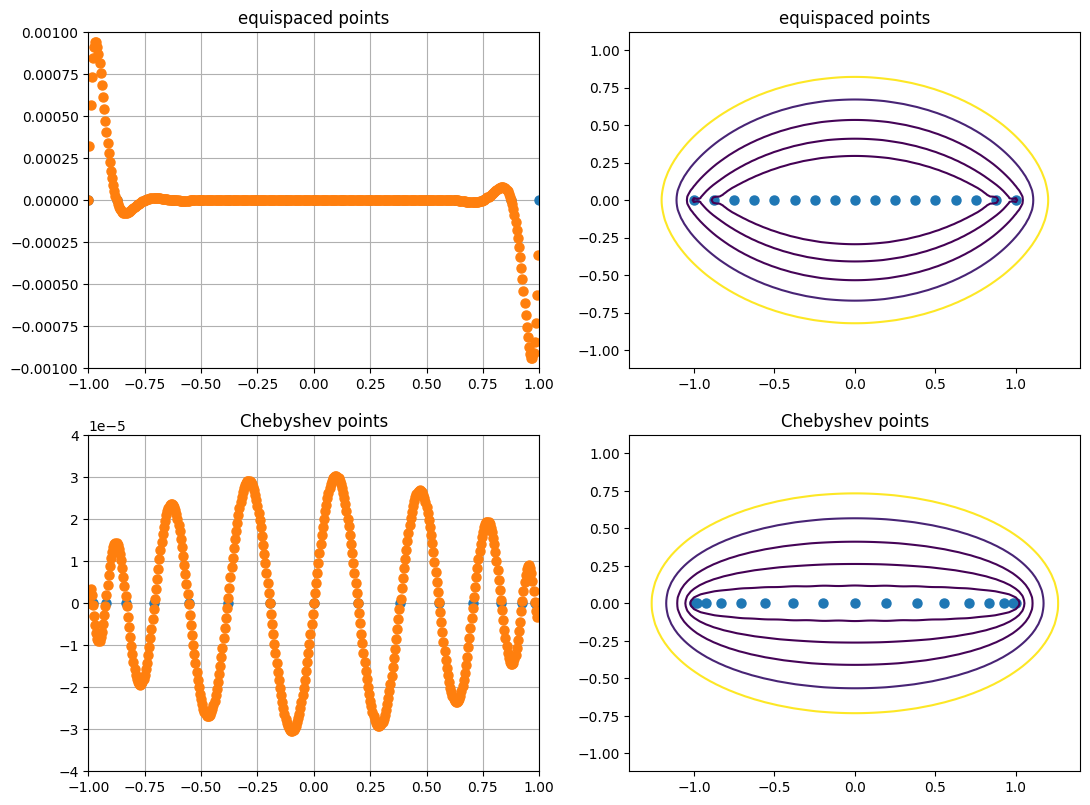

In [14]:
# Adapted from program 10 in Trefethen - "Spectral Methods for MATLAB"
N = 16

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)

for (i, point_distribution) in enumerate(("equispaced points", "Chebyshev points")):
    if i == 0:
        x = -1.0 + 2.0 * numpy.arange(N + 1) / N
    else:
        x = numpy.cos(numpy.pi * numpy.arange(N+1) / N)
    
    # Construct polynomial with roots at x
    p = numpy.poly(x)
    
    # Plot p(x) over [-1, 1]
    x_fine = numpy.arange(-1, 1, .005)
    axes[i, 0].plot(x, 0*x, '.', markersize=13)
    axes[i, 0].plot(x_fine, numpy.polyval(p, x_fine), '.', markersize=13)
    axes[i, 0].grid(True)
    axes[i, 0].set_title(point_distribution)
    axes[i, 0].set_xlim((-1, 1))
    if i == 0:
        axes[i, 0].set_ylim((-1e-3, 1e-3))
    else:
        axes[i, 0].set_ylim((-4e-5, 4e-5))
    
    # Plot equipotential curves
    axes[i, 1].plot(x.real, x.imag, '.', markersize=13)
    axes[i, 1].set_xlim((-1.4, 1.4))
    axes[i, 1].set_ylim((-1.12, 1.12))
    X, Y = numpy.meshgrid(numpy.arange(-1.4, 1.4, 0.02), 
                          numpy.arange(-1.12, 1.12, 0.02))
    levels = 10**(numpy.arange(-4.0, 1.0))
    axes[i, 1].contour(X, Y, numpy.abs(numpy.polyval(p, X + 1j * Y)), levels)
    axes[i, 1].set_title(point_distribution)

### Diferensiasi Chebyshev

Salah satu cara untuk mendapatkan perbedaan hingga adalah dengan menginterpolasi polinomial melalui titik-titik stensil dan mengambil turunan dari interpolasi yang dihasilkan.  Kita dapat melakukan hal yang sama untuk menemukan matriks diferensiasi Chebyshev.  Karena setiap interpolasi unik berdasarkan titik-titik yang dilaluinya, kita hanya perlu menentukan turunannya berdasarkan titik-titik Chebyshev itu sendiri.

Misalkan
$$
 p_N(x_j) = v_j, \quad 0 \leq j \leq N 
$$
adalah polinomial berderajat $N$, maka turunan yang dihasilkan adalah
$$
 p'_N(x_j) = w_j.
$$

Karena operasi ini bersifat linier, kita dapat membentuknya sebagai perkalian dengan matriks:
$$
 \mathbf{w} = \mathbf{D}_N \mathbf{v}
$$

Sebagai contoh, pertimbangkan kasus ketika $ N = 1, maka titik interpolasi adalah $ x_0 = 1 $ dan $ x_1 = -1 $ yang mengarah ke
$$
    p_1(x) = \frac{1}{2} (1  + x)v_0 + \frac{1}{2}(1 - x)v_1
$$
yang mana
$$
    p'_1(x) = \frac{1}{2}(v_0 - v_1).
$$
Matriks yang dihasilkan kemudian adalah
$$
    D_1 = \begin{bmatrix}
        1/2 & -1/2 \\
        1/2 & -1/2
    \end{bmatrix}.
$$


Untuk kasus $N=2$ kita memiliki titik-titik $x_0 = 1$, $x_1 = 0$, dan $x_2 = -1$ dengan interpolasi kuadratik
$$
 p_2(x) = \frac{1}{2} x (1 + x) v_0 + (1+x)(1-x) v_1 + \frac{1}{2} x (x- 1) v_2
$$
yang mengarah ke turunan
$$
 p'_2(x) = (x+ 1/2) v_0 - 2 x v_1 + (x-1/2)v_2
$$
dan matriks diferensiasi
$$
 D_2 = \begin{bmatrix}
        3/2 & -2 & 1/2 \\
 1/2 & 0 & -1/2 \\
        -1/2 & 2 & -3/2
 \end{bmatrix}.
$$

Perhatikan bahwa untuk kedua kasus ini, rumus-rumus ini memiliki bentuk yang sudah dikenal, namun matriks diferensiasinya memiliki sifat satu sisi tambahan.  Untuk pendekatan orde tinggi, hal ini berbeda dengan metode beda hingga biasa karena jarak titik-titik yang tidak sama.  Secara umum, matriks diferensiasi Chebyshev berbentuk
$$\begin{aligned}
 (D_N)_{00} = \frac{2 N^2 + 1}{6}, & & (D_N)_{NN} = -\frac{2N^2 + 1}{6}, \\
 (D_N)_{jj} = \frac{-x_j}{2(1 - x_j^2)}, & & j=1,\ldots,N-1 \\
 (D_N)_{ij} = \frac{c_i(-1)^{i+j}}{c_j (x_i - x_j)}, & & i\neq j, ~~ i,j = 0, \ldots, N
\end{aligned}$$
where
$$
 c_i = \left \{\begin{aligned}
 2, & & i=0 \text{ or } N \\
 1, & & \text{sebaliknya}.
    \end{aligned} \right .
$$

In [15]:
# Based on Trefethen cheb function and
# the post at http://www.scientificpython.net/pyblog/pseudospectral-differentiation
import operator
import scipy
from functools import reduce

def cheb(N):
    x = numpy.cos(numpy.pi * numpy.arange(N+1) / N)
    e = scipy.ones((N + 1, 1))
    Xdiff = scipy.outer(x, e) - scipy.outer(e, x) + scipy.identity(N + 1)
    xprod = -reduce(operator.mul, Xdiff) # product of rows
    W = scipy.outer(1.0 / xprod, e)
    D = W / scipy.multiply(W.T, Xdiff)
    d = 1-sum(D)

    for k in range(0, N+1):  # Set diagonal elements
        D[k,k] = d[k]

    return -D.T, x

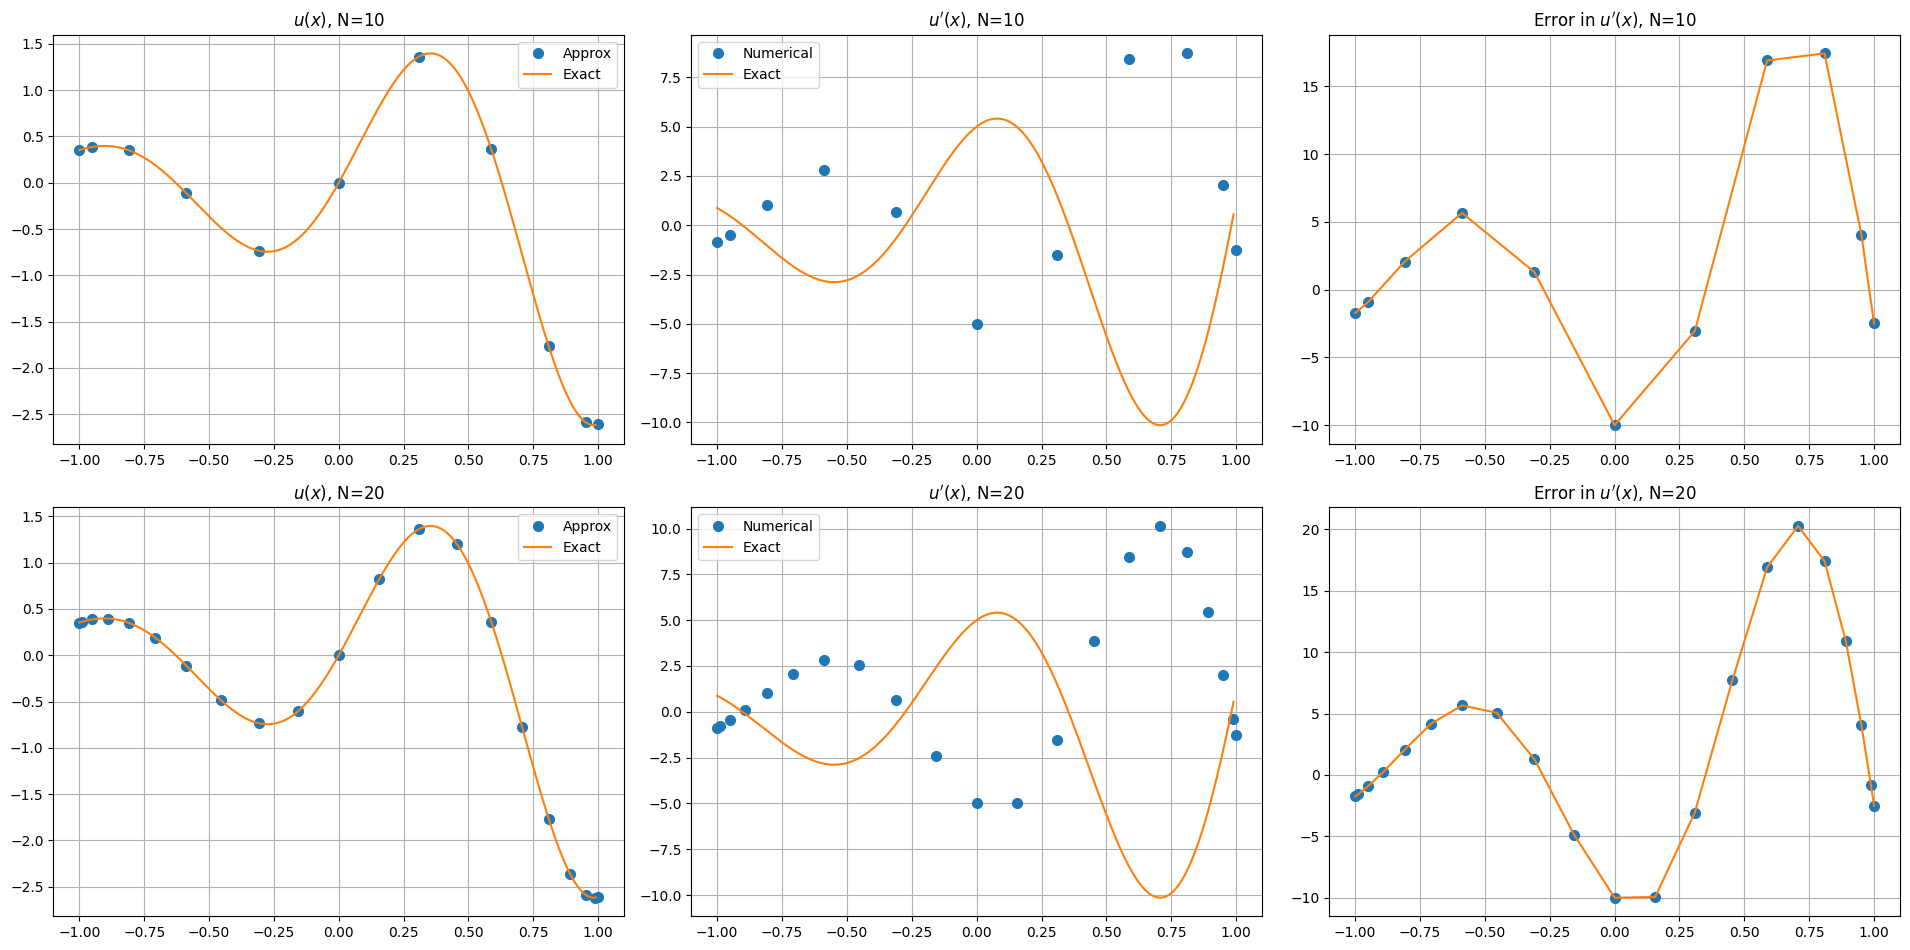

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import operator
from functools import reduce

# Fungsi untuk membuat matriks diferensiasi Chebyshev dan titik Chebyshev
def cheb(N):
    if N == 0:
        D = np.array([[0]])
        x = np.array([1.0])
        return D, x
    x = np.cos(np.pi * np.arange(N + 1) / N)
    c = np.ones(N + 1)
    c[0] = 2
    c[-1] = 2
    c = c * (-1) ** np.arange(N + 1)
    X = np.tile(x, (N + 1, 1))
    dX = X - X.T + np.eye(N + 1)
    D = (np.outer(c, 1 / c)) / dX
    D = D - np.diag(np.sum(D, axis=1))
    return D, x

# Fungsi dan turunannya
u = lambda x: np.exp(x) * np.sin(5.0 * x)
u_prime = lambda x: np.exp(x) * (np.sin(5.0 * x) + 5.0 * np.cos(5.0 * x))

# Titik evaluasi halus untuk visualisasi
x_fine = np.arange(-1, 1, 0.01)

# Buat plot
fig, axes = plt.subplots(2, 3)
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 2)

# Lakukan diferensiasi numerik untuk beberapa nilai N
for (i, N) in enumerate((10, 20)):
    D, x = cheb(N)
    u_vals = u(x)
    u_prime_vals = u_prime(x)
    Du = np.dot(D, u_vals)
    error = Du - u_prime_vals

    # Plot fungsi u(x)
    axes[i, 0].plot(x, u_vals, '.', markersize=14, label='Approx')
    axes[i, 0].plot(x_fine, u(x_fine), label='Exact')
    axes[i, 0].grid(True)
    axes[i, 0].set_title(f'$u(x)$, N={N}')
    axes[i, 0].legend()

    # Plot turunan u'(x)
    axes[i, 1].plot(x, Du, '.', markersize=14, label='Numerical')
    axes[i, 1].plot(x_fine, u_prime(x_fine), label='Exact')
    axes[i, 1].grid(True)
    axes[i, 1].set_title(f"$u'(x)$, N={N}")
    axes[i, 1].legend()

    # Plot error
    axes[i, 2].plot(x, error, '.', markersize=14)
    axes[i, 2].plot(x, error)
    axes[i, 2].grid(True)
    axes[i, 2].set_title(f"Error in $u'(x)$, N={N}")

plt.tight_layout()
plt.show()


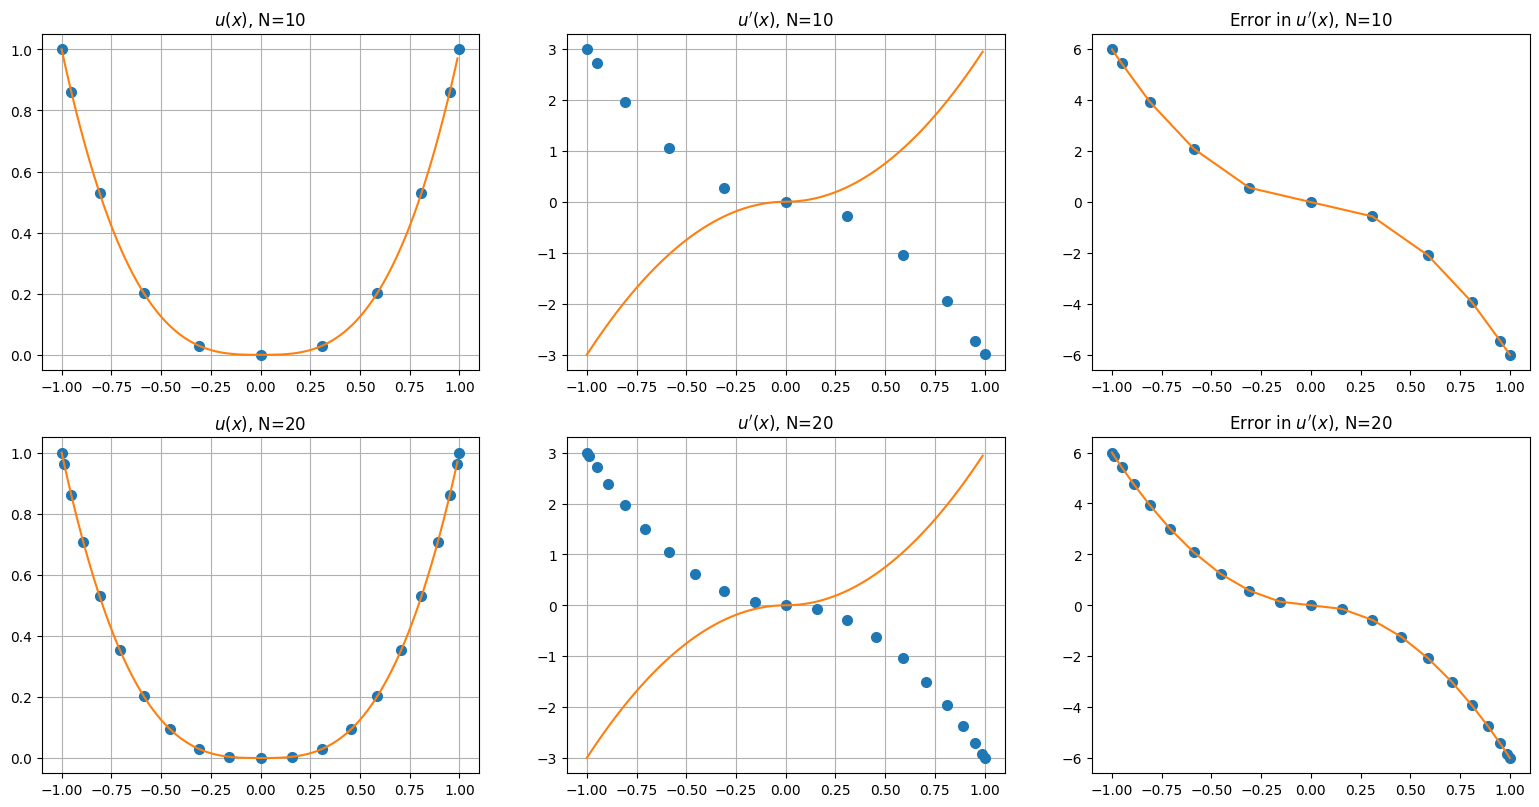

In [19]:
# Bounded Variation in 3rd derivative
u = lambda x: numpy.abs(x)**3
u_prime = lambda x: 3.0 * x * numpy.abs(x)

x_fine = numpy.arange(-1, 1, 0.01)
fig, axes = plt.subplots(2, 3)
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 2)
for (i, N) in enumerate((10, 20)):
    D, x = cheb(N)
    axes[i, 0].plot(x, u(x), '.', markersize=14)
    axes[i, 0].grid(True)
    axes[i, 0].plot(x_fine, u(x_fine))
    axes[i, 0].set_title('$u(x)$, N=%s' % N)

    axes[i, 1].plot(x, numpy.dot(D, u(x)), '.', markersize=14)
    axes[i, 1].grid(True)
    axes[i, 1].plot(x_fine, u_prime(x_fine))
    axes[i, 1].set_title("$u'(x)$, N=%s" % N)
    
    error = numpy.dot(D, u(x)) - u_prime(x)
    axes[i, 2].plot(x, error, '.', markersize=14)
    axes[i, 2].plot(x, error)
    axes[i, 2].set_title("Error in $u'(x)$, N=%s" % N)

plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2688\1928812553.py:28: SyntaxWarning: invalid escape sequence '\e'
  titles = ['$|x^3|$', '$\exp(-x^{-2})$', '$1 / (1 + x^2)$', '$x^10$']


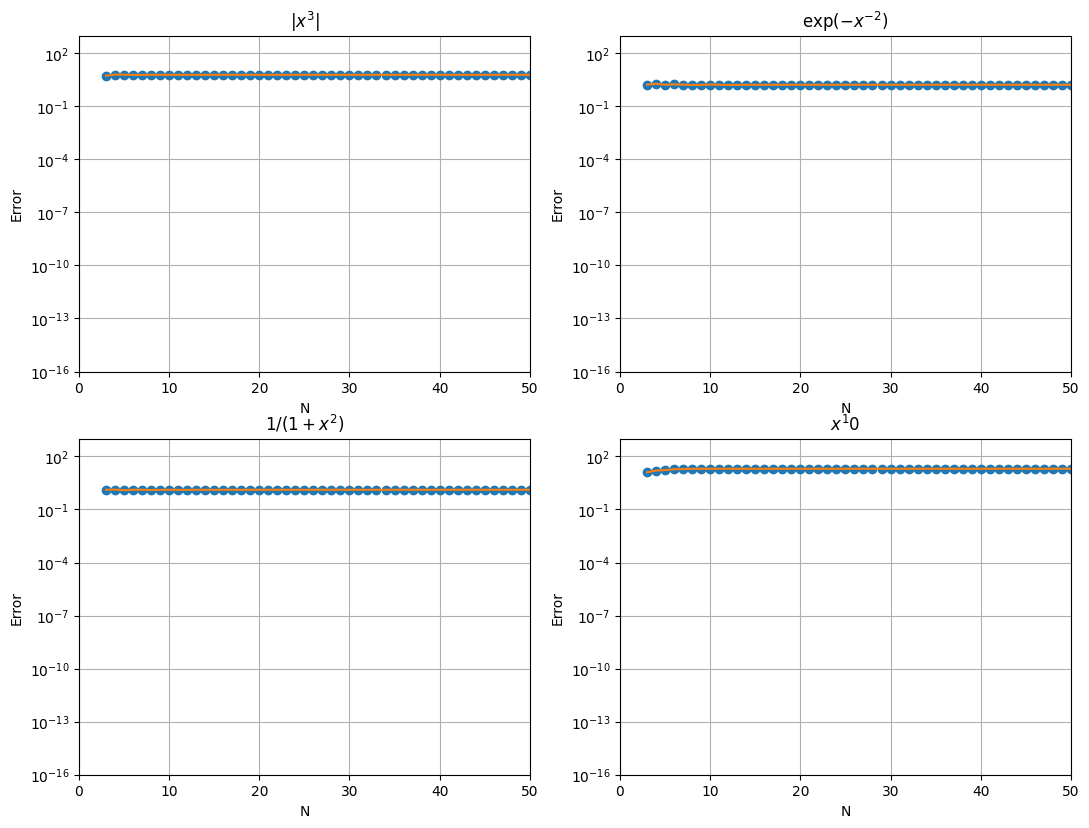

In [23]:
# Compare errors more carefully (program 12 in Trefethen)
N_max = 50
error = numpy.zeros((4, N_max - 2))
N_range = numpy.arange(3, N_max + 1)
for (i, N) in enumerate(N_range):
    D, x = cheb(N)
    # 3rd derivative of bounded variation
    v = numpy.abs(x)**3
    v_prime = numpy.abs(x) * x * 3.0
    error[0, i] = numpy.linalg.norm(numpy.dot(D, v) - v_prime, ord=numpy.inf)
    # C_\infty function
    v = numpy.exp(-x**(-2))
    v_prime = 2 * v / x**3
    error[1, i] = numpy.linalg.norm(numpy.dot(D, v) - v_prime, ord=numpy.inf)
    # Analytic on [-1, 1]
    v = 1.0 / (1.0 + x**2)
    v_prime = -2.0 * x * v**2
    error[2, i] = numpy.linalg.norm(numpy.dot(D, v) - v_prime, ord=numpy.inf)
    # Polynomial
    v = x**10
    v_prime = 10 * x**9
    error[3, i] = numpy.linalg.norm(numpy.dot(D, v) - v_prime, ord=numpy.inf)
    
# Plot errors
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
titles = ['$|x^3|$', '$\exp(-x^{-2})$', '$1 / (1 + x^2)$', '$x^10$']
for (i, title) in enumerate(titles):
    axes = fig.add_subplot(2, 2, i + 1)
    axes.semilogy(N_range, error[i, :], '.', markersize=12)
    axes.semilogy(N_range, error[i, :])
    axes.set_xlim((0, N_max))
    axes.set_ylim((1e-16, 1e3))
    axes.grid(True)
    axes.set_xlabel("N")
    axes.set_ylabel("Error")
    axes.set_title(title)


Sebagai aplikasi lain dari matriks diferensiasi Chebyshev, kita juga dapat menggunakannya untuk menghitung solusi dari masalah Poisson dengan kondisi batas non-periodik.  Pertimbangkan masalah
$$
 u_{xx} = e^{4x},\quad \Omega = [-1, 1], \quad u(\pm 1) = 0
$$
yang memiliki solusi
$$
 u(x) = \frac{e^{4x} - x \sinh(4) - \cosh(4)}{16}.
$$
Melanjutkan dari sebelumnya, kita memiliki
$$
 D^2_N U = F
$$
yang kemudian dapat dibalik untuk menemukan solusinya.

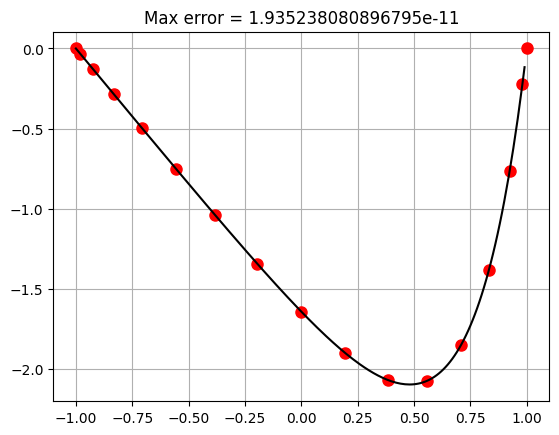

In [25]:
# Adapted from Trefethen program 13
f = lambda x: numpy.exp(4.0 * x)
u_true = lambda x: (numpy.exp(4.0 * x) - x * numpy.sinh(4.0) - numpy.cosh(4.0)) / 16.0

N = 16
x_fine = numpy.arange(-1, 1, 0.01)

# Compute square and remove boundaries
D, x = cheb(N)
D2 = numpy.dot(D, D)[1:-1, 1:-1]

# Solve problem
U = numpy.zeros(N + 1)
U[1:-1] = numpy.linalg.solve(D2, f(x[1:-1]))
error = numpy.linalg.norm(U - u_true(x), ord=numpy.inf)

# Plot results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, U, 'r.', markersize=16)
axes.plot(x_fine, u_true(x_fine), 'k')
axes.grid(True)
axes.set_title("Max error = %s" % error)
plt.show()

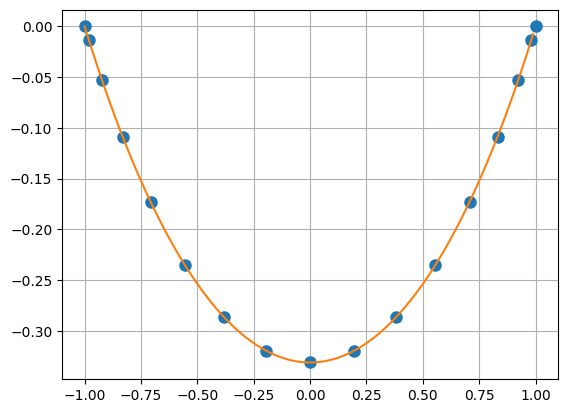

In [26]:
# Adapted from Trefethen program 14 - Non-linear Elliptic
f = lambda u: numpy.exp(u)

N = 16
x_fine = numpy.arange(-1, 1, 0.01)

# Compute square and remove boundaries
D, x = cheb(N)
D2 = numpy.dot(D, D)[1:-1, 1:-1]

# Solve problem using fixed point iteration
U = numpy.zeros(N + 1)
U_new = numpy.zeros(N + 1)
delta = 1.0
step = 0
while delta > 1e-15:
    U_new[1:-1] = numpy.linalg.solve(D2, f(U[1:-1]))
    delta = numpy.linalg.norm(U_new - U, ord=numpy.inf)
    U = U_new
    step += 1

# Plot results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, U, '.', markersize=16)
U_interp = numpy.polyval(numpy.polyfit(x, U, N), x_fine)
axes.plot(x_fine, U_interp, '-')
axes.grid(True)
plt.show()

Kita juga bisa mengerjakan soal-soal dengan dimensi yang lebih tinggi.  Pertimbangkan PDE
$$
 u_{xx} + u_{yy} = 10 \sin(8 x (y - 1)), \quad -1 < x, ~y < 1
$$
dengan $u = 0$ pada batas.  Kita dapat terus menggunakan matriks diferensiasi yang kita gunakan di atas.  Jika kita mengurutkan hal-hal yang tidak diketahui dalam urutan natural dari sebelumnya, kita dapat kembali menggunakan produk Kronecker untuk membuat matriks yang relevan.

Sebagai contoh, jika kita mempertimbangkan kasus $N=4$, kita memiliki matriks diferensiasi dalam satu dimensi
$$
 D^2_4 = \begin{bmatrix}
        -14 & 6 & -2 \\
 4 & -6 & 4 \\
        -2 & 6 & -14
 \end{bmatrix}
$$
yang dapat memperkirakan matriks dimensi x dengan urutan yang ditentukan sebagai `kron (I, D2) ` yang mengarah ke
$$
 I \otimes D^2_N = \begin{bmatrix}
        -14 & 6 & -2 \\
 4 & -6 & 4 \\
        -2 & 6 & -14 \\
 & & & -14 & 6 & -2 \\
 & & & 4 & -6 & 4 \\
 & & & -2 & 6 & -14 \\
 & & & & -14 & 6 & -2 \\
 & & & & 4 & -6 & 4 \\
 & & & & -2 & 6 & -14
 \end{bmatrix}.
$$

Secara keseluruhan kita bisa mendapatkan operator Laplacian yang didiskritisasi dengan menambahkan dua matriks di atas dengan
$$
 L_N = I \ kali D^2_N + D^2_N \ kali I.
$$

Kelemahan dari penggunaan matriks-matriks ini dibandingkan dengan metode beda hingga adalah bahwa matriks-matriks ini tidak begitu banyak.  Untungnya, jika kita dapat memanfaatkan konvergensi spektral dari metode-metode ini, kita akan dapat menggunakan lebih sedikit titik untuk menyelesaikan sistem.

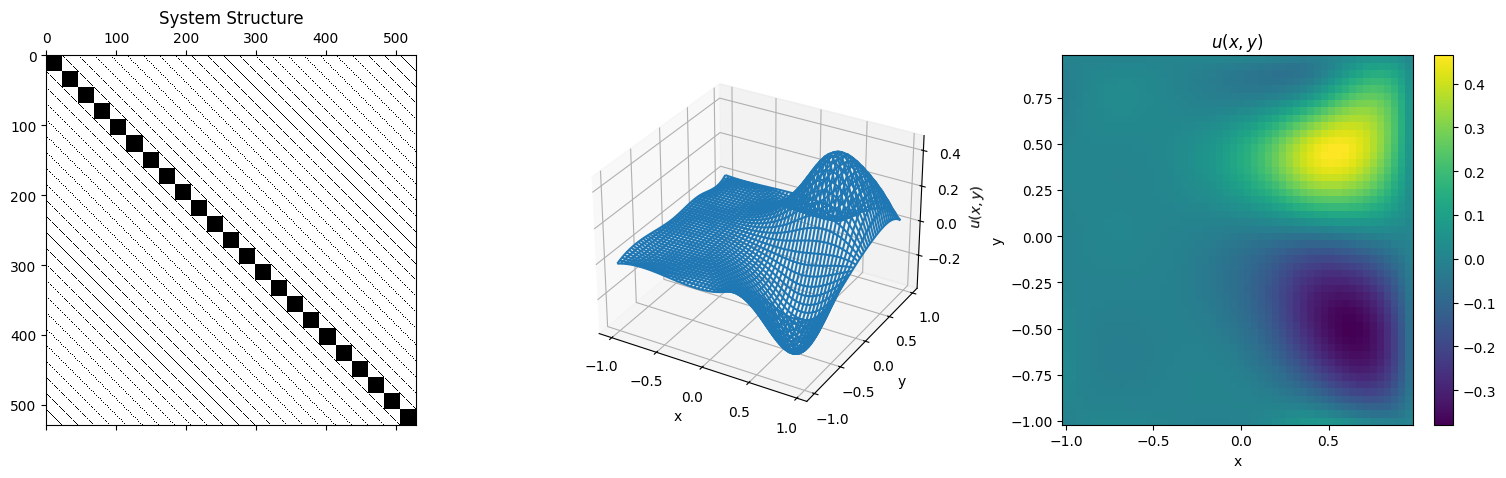

In [27]:
# Based on Trefethen program 16
import mpl_toolkits.mplot3d
import scipy.interpolate

f = lambda x, y: 10.0 * numpy.sin(8.0 * x * (y - 1.0))

N = 24
D, x = cheb(N)
X, Y = numpy.meshgrid(x[1:-1], x[1:-1])
X = X.flatten()
Y = Y.flatten()

D2 = numpy.dot(D, D)
D2 = D2[1:-1, 1:-1]
I = numpy.eye(N - 1)
L = numpy.kron(I, D2) + numpy.kron(D2, I)

# Solve system
U = numpy.linalg.solve(L, f(X, Y))

# Plot system structure and results
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)

axes = fig.add_subplot(1, 3, 1)
axes.spy(L)
axes.set_title("System Structure")

u = numpy.zeros((N + 1, N + 1))
u[1:-1, 1:-1] = U.reshape(N - 1, N - 1)
X, Y = numpy.meshgrid(x, x)
x_fine = numpy.arange(-1, 1, 0.04)
X_fine, Y_fine = numpy.meshgrid(x_fine, x_fine)
u_interpolant = scipy.interpolate.bisplrep(X, Y, u, s=1)
u_fine = scipy.interpolate.bisplev(x_fine, x_fine, u_interpolant)

axes = fig.add_subplot(1, 3, 2, projection='3d')
axes.plot_wireframe(X_fine, Y_fine, u_fine)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('$u(x,y)$')

axes = fig.add_subplot(1, 3, 3)
plot = axes.pcolor(X_fine, Y_fine, u_fine)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('$u(x,y)$')
fig.colorbar(plot)

plt.show()

## FFT dan Chebyshev

FFT adalah alat yang sangat kuat yang benar-benar membuat metode spektral menjadi menarik, namun kita hanya melihat bagaimana FFT dapat digunakan pada deret Fourier.  Ternyata seperangkat ekuivalensi akan memungkinkan kita untuk menggunakan FFT pada deret Chebyshev juga.

Misalkan $z \in \mathbb C$ sedemikian rupa sehingga $|z| = 1$, biarkan $\theta$ menjadi argumen dari $z$, yaitu $z = e^{i \theta}$ (catat bahwa $\theta$ hanya unik hingga kelipatan $2 \pi$), dan $x$ menjadi bagian riil dari $z$ sehingga $x = \Re z = \cos \theta$.  Untuk semua $x \in [-1, 1]$, terdapat dua nilai $z$ yang sesuai dengan naik dan turunnya $z$ pada lingkaran satuan, yaitu
$$
 x = \Re z = \frac{1}{2} (z + z^{-1}) = \cos \theta.

Sekarang perhatikan polinomial Chebyshev $T_n(x)$ dimana polinomial $n+1$ adalah
$$
 T_{n+1}(x) = \frac{1}{2} (z^{n+1} + z^{-n-1}) = \frac{1}{2} (z^n + z^{- n}) - \frac{1}{2}(z^{n-1} + z^{1-n})
$$
yang juga sesuai dengan relasi perulangan untuk polinomial Chebyshev dari
$$
 T_{n+1}(x) = 2 x T_n(x) - T_{n-1}(x).
$$
Perhatikan bahwa kita sebenarnya menggunakan hubungan antara $x$ dan $z$ yang kita dapatkan dari hubungan lingkaran satuan.

Karena kita juga mengetahui bahwa $T_n(x)$ adalah sebuah polinomial berderajat $n$, kita bisa menggunakan polinomial Chebyshev sebagai dasar
$$
 p(x) = \sum^\infty_{n=0} a_n T_n(x), \quad x \in [-1, 1].
$$
Ini juga sesuai dengan polinomial Laurent berderajat $N$ dalam $z$ dan $z^{-1}$ sehingga $z^n$ dan $z^{-n}$ memiliki koefisien yang sama
$$
 \tilde{p}(z) = \frac{1}{2} \sum^\infty_{n=0} a_n (z^n + z^{-n}), \quad |z| = 1,
$$
juga dikenal sebagai timbal-balik.  Ada satu lagi polinomial lain dalam $\theta$ yaitu $2 \pi$ periodik sehingga
$$
 P(\theta) = \sum^\infty_{n=0} a_n \cos n \theta, \quad \theta \in \mathbb R.
$$

Jadi, kemana hal ini membawa kita?  Kita tahu bahwa polinomial ini setara jika kita memiliki hubungan yang telah kita tentukan di awal antara variabel independen $x$, $z$, dan $\theta$.  Sekarang mari kita pertimbangkan bagaimana polinomial ini akan bertindak sebagai interpolasi.

Misalkan $f(x)$ adalah sebuah fungsi sembarang pada $[-1, 1]$, kita dapat membentuk sebuah fungsi timbal-balik $\tilde{f~}(z)$ dengan
$$
    \tilde{f~}(z) = f\left(1/2 (z + z^{-1})\right)
$$
dan secara koresponden
$$
    F(\theta) = f(\cos \theta).
$$

Sekarang mari kita lihat bagaimana versi terpotong dari polinomial kita menginterpolasi fungsi-fungsi ini.  Interpolasi akan memiliki titik-titik nodal di
$$
 \theta_j = j \pi / N, \quad z_j = e^{i\theta_j}, \quad \text{and}  \quad x_j = \cos \theta_j = \Re z_j.
$$
Dengan ini, kita dapat membuat pernyataan berikut mengenai polinomial terpotong ini sehubungan dengan fungsi $f(z)$:
 - $P(\theta)$ menginterpolasi $F(\theta)$ (dengan asumsi bahwa itu genap dan 2 \pi-periodik) di titik-titik yang berjarak sama $\theta_j$,
 - $\tilde{p~}(z)$ menginterpolasi $\tilde{z~}$ dalam akar-akar persatuan $z_j$
 - $p(x)$ menginterpolasi $f(x)$ di titik-titik Chebyshev $x_j$

Sekarang kita dapat mulai melihat bagaimana kita dapat menggunakan FFT dengan seri Chebyshev karena ekuivalensi ini.  Proses dasarnya adalah sebagai berikut:
1. Diberikan $f$ sembarang, temukan interpolasi polinomial trigonometri $Q$ dari $F$,
2. Bedakan interpolasi ini dalam ruang Fourier, dan
3. Transformasikan kembali ke domain asli pada $x \in [-1, 1]$.

In [28]:
# Based on Trefethen chebfft function
def chebfft(v):
    N = v.shape[0] - 1
    if N == 0:
        return 0
    x = numpy.cos(numpy.arange(N+1) * numpy.pi / N)
    ii = numpy.arange(N)
    
    # Transform x to \theta
    V = numpy.hstack((v, v[N-1:0:-1]))
    U = fft.fft(V).real
    wave_numbers = numpy.hstack((ii, [0], numpy.arange(1-N, 0)))
    W = fft.ifft(1j * wave_numbers * U).real
    w = numpy.zeros((N+1))
    
    # Transform back to x from \theta
    w[1:N] = -W[1:N] / numpy.sqrt(1.0 - x[1:N]**2)
    w[0] = numpy.sum(ii**2 * U[ii]) / N + 0.5 * N * U[N]
    w[-1] = numpy.sum((-1)**(ii + 1) * ii**2 * U[ii]) / N + 0.5 * (-1)**(N+1) * N * U[N]
    
    return w

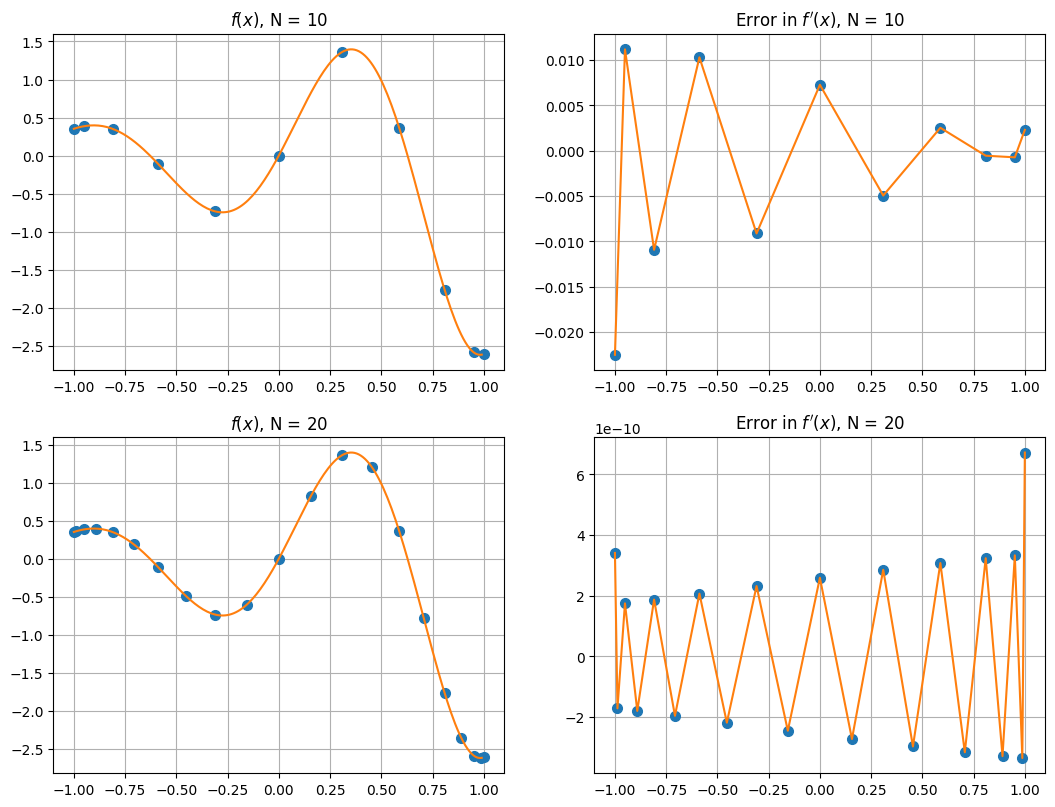

In [29]:
# Adaptation of program 18 in Trefethen
f = lambda x: numpy.exp(x) * numpy.sin(5.0 * x)
f_prime = lambda x: numpy.exp(x) * (numpy.sin(5.0 * x) + 5.0 * numpy.cos(5.0 * x))
x_fine = numpy.arange(-1, 1, 0.01)

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
for (i, N) in enumerate((10, 20)):
    x = numpy.cos(numpy.pi * numpy.arange(N+1) / N)
    axes[i, 0].plot(x, f(x), '.', markersize=14)
    axes[i, 0].plot(x_fine, f(x_fine))
    axes[i, 0].grid(True)
    axes[i, 0].set_title("$f(x)$, N = %s" % N)
    
    error = chebfft(f(x)) - f_prime(x)
    axes[i, 1].plot(x, error, '.', markersize=14)
    axes[i, 1].plot(x, error)
    axes[i, 1].grid(True)
    axes[i, 1].set_title("Error in $f'(x)$, N = %s" % N)

Kita juga dapat menerapkan metode-metode ini untuk menyelesaikan PDE dengan menggunakan metode spektral Chebyshev pada arah spasial dan beberapa diskritisasi waktu pada arah waktu.   Pertimbangkan persamaan gelombang orde dua
$$
 u_{tt} = u_{xx}
$$
pada $\Omega = [-1, 1]$ dan syarat batas yang ditetapkan ke $0$.  Kita akan kembali menggunakan lompatan untuk melakukan integrasi waktu.

(81,) 161 81


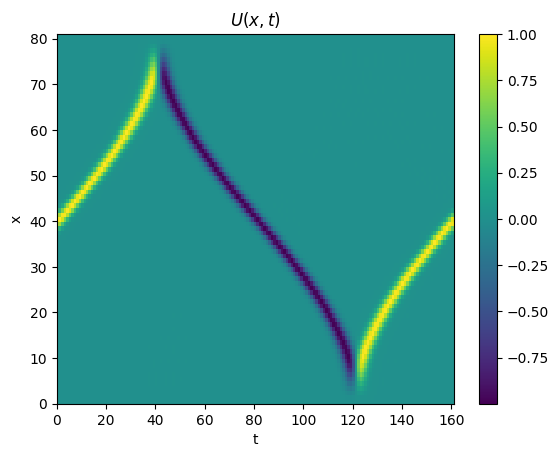

In [30]:
# Based on program 19 of Trefethen
# Solve the 2nd order wave equation on Chebyshev grid via leapfrog

N = 80
x = numpy.cos(numpy.pi * numpy.arange(0, N+1) / N)
delta_t = 8.0 / N**2
U = numpy.exp(-200.0 * x**2)
U_old = numpy.exp(-200.0 * (x - delta_t)**2)
t_final = 4.0

num_steps = int(numpy.ceil(t_final / delta_t))
plot_interval = 20
# t = numpy.linspace(0.0, t_final, num_steps)
t = 0.0
num_output = int(num_steps / plot_interval) + 1
t_output = numpy.empty(num_output)
t_output[0] = 0.0
U_output = numpy.empty((x.shape[0], num_output))
U_output[:, 0] = U.copy()
frame = 1
for n in range(num_steps):
    U_hat_dbl_prime = chebfft(chebfft(U))
    U_hat_dbl_prime[0] = 0.0
    U_hat_dbl_prime[-1] = 0.0
    
    U_new = 2.0 * U - U_old + delta_t**2 * U_hat_dbl_prime
    U_old = U.copy()
    U = U_new

    t += delta_t
    if numpy.mod(n, plot_interval) == 0:
        t_output[frame] = t
        U_output[:, frame] = U.copy()
        frame += 1

fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 2)
# fig.set_figheight(fig.get_figheight() * 2)
axes = fig.add_subplot(1, 1, 1)
print(x.shape, len(t_output), len(U_output))
# plot = axes.pcolor(x, t_output, U_output)
plot = axes.pcolor(U_output)
axes.set_xlabel("t")
axes.set_ylabel("x")
axes.set_title("$U(x,t)$")
fig.colorbar(plot)

plt.show()

## Kuadratur Spektral

Salah satu konsekuensi yang lebih kuat dari banyak hal yang telah kita lakukan sebenarnya dapat dilihat melalui integral.  Karena integral adalah operasi penghalusan, mungkin tidak terlalu mengejutkan jika hal ini terjadi.

Jika kita ingin mengestimasi integral
$$
 I = \int^1_{-1} f(x) dx
$$
salah satu cara yang dapat kita lakukan adalah dengan mencari interpolasi polinomial dari $f(x)$ dan mengintegrasikannya.  Ini dikenal sebagai kuadratur Clenshaw-Curtis dan merupakan orde optimal pada sekumpulan node Chebyshev yang tetap.

Kita akan mengikuti proses yang kita gunakan untuk menghubungkan FFT dengan deret Chebyshev sehingga kita memiliki
$$\begin{aligned}
    \int^1_{-1} p(x) dx &= \int^1_{-1} p(z) \frac{dx}{dz} dz \\
    &= \frac{1}{4} \sum^N_{n=0} a_n \int^1_{-1} (z^n + z^{-n}) (1 - z^{-2}) dz\\
    &= \frac{1}{4} \sum^N_{n=0} a_n \int^1_{-1} (z^n - z^{n - 2} + z^{-n} - z^{-n - 2}) dz \\
    &= \frac{1}{4} \sum^N_{n=0} a_n \left(\left. \frac{z^{n+1} + z^{-n-1}}{n+1} \right |^1_{-1} - \left. \frac{z^{n-1} + z^{-n+1}}{n-1} \right |^1_{-1} \right) \\
    &= \sum^N_{n=0, n \text{even}} a_n \left(\frac{1}{n+1} - {1}{n - 1}\right) \\
    &= \sum^N_{n=0, n \text{even}} \frac{2a_n}{1 - n^2}.
\end{aligned}$$
Dengan ini, kita menggunakan FFT untuk menentukan $a_n$ seperti yang telah dijelaskan sebelumnya.

In [31]:
def cheb_diff(N):
    """Compute the inverse differentiation matrix and return the x locations."""
    D, x = cheb(N)
    D_inv = numpy.linalg.inv(D[:-1, :-1])
    x = x[:-1]
    
    return D_inv, x

<>:32: SyntaxWarning: invalid escape sequence '\e'
<>:32: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2688\2855189699.py:32: SyntaxWarning: invalid escape sequence '\e'
  titles = ['$|x^3|$', '$\exp(-x^{-2})$', '$1 / (1 + x^2)$', '$x^10$']


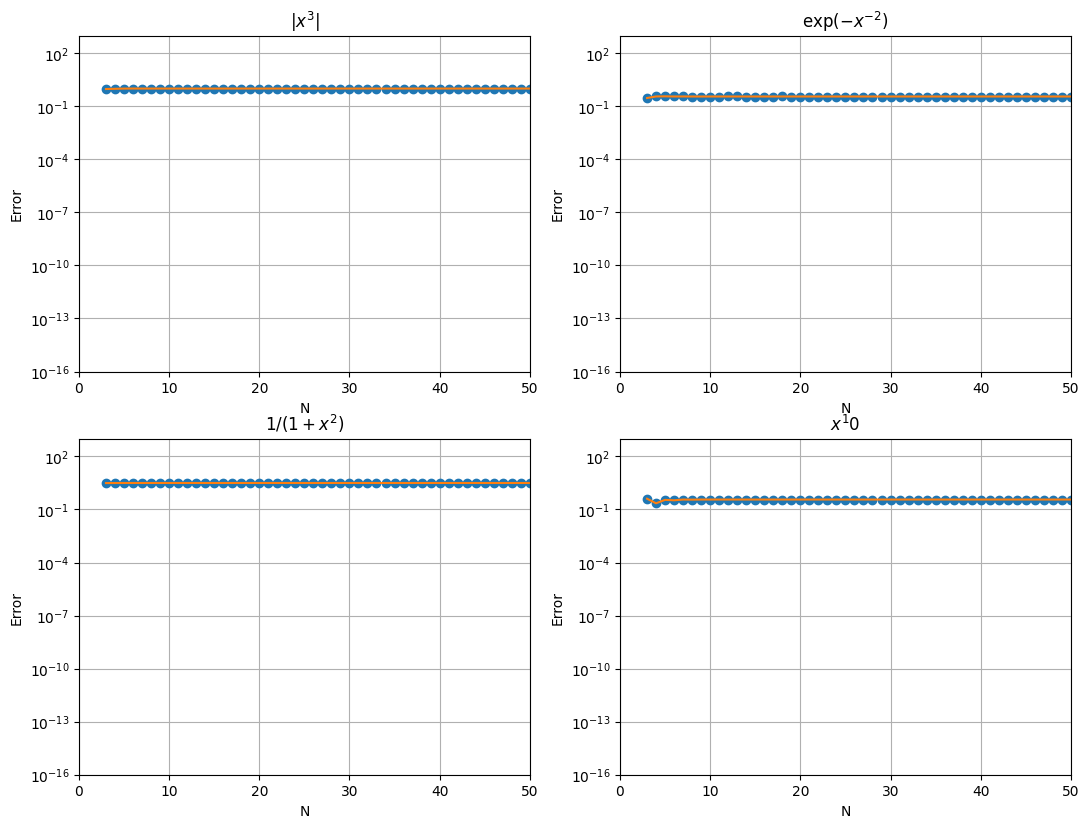

In [ ]:
# Compare errors more carefully (program 30 in Trefethen)
#  Example directly uses Chebyshev differentiation matrix
import scipy.special

N_max = 50
error = numpy.zeros((4, N_max - 2))
N_range = numpy.arange(3, N_max + 1)
for (i, N) in enumerate(N_range):
    D_inv, x = cheb_diff(N)
    
    # 3rd derivative of bounded variation
    f = numpy.abs(x)**3
    f_int = 0.5
    error[0, i] = numpy.abs(numpy.dot(D_inv[0, :].transpose(), f) - f_int)
    # C_\infty function
    f = numpy.exp(-x**(-2))
    f_int = 2.0 * (numpy.exp(-1) + numpy.sqrt(numpy.pi) * (scipy.special.erf(1) - 1))
    error[1, i] = numpy.abs(numpy.dot(D_inv[0, :].transpose(), f) - f_int)
    # Analytic on [-1, 1]
    f = 1.0 / (1.0 + x**2)
    f_int = numpy.pi / 2.0
    error[2, i] = numpy.abs(numpy.dot(D_inv[0, :].transpose(), f) - f_int)
    # Polynomial
    f = x**10
    f_int = 2.0 / 11.0
    error[3, i] = numpy.abs(numpy.dot(D_inv[0, :].transpose(), f) - f_int)
    
# Plot errors
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
titles = ['$|x^3|$', '$\exp(-x^{-2})$', '$1 / (1 + x^2)$', '$x^10$']
for (i, title) in enumerate(titles):
    axes = fig.add_subplot(2, 2, i + 1)
    axes.semilogy(N_range, error[i, :], '.', markersize=12)
    axes.semilogy(N_range, error[i, :])
    axes.set_xlim((0, N_max))
    axes.set_ylim((1e-16, 1e3))
    axes.grid(True)
    axes.set_xlabel("N")
    axes.set_ylabel("Error")
    axes.set_title(title)

In [33]:
def clencurt(N):
    raise NotImplementedError("This does not work yet :(")
    theta = numpy.pi * numpy.arange(N + 1) / N
    x = numpy.cos(theta)
    w = numpy.zeros(N + 1)
    # ii = numpy.arange(1, N)
    v = numpy.ones(N - 1)
    if numpy.mod(N, 2) == 0:
        w[0] = 1.0 / (N**2 - 1.0)
        w[-1] = w[0]
        for k in range(N / 2):
            v -= 2.0 * numpy.cos(2.0 * k * theta[1:-1]) / (4.0 * k**2 - 1.0)
        v -= numpy.cos(N * theta[1:-1]) / (N**2 - 1.0)
    else:
        w[0] = 1.0 / N**2
        w[-1] = w[0]
        for k in range((N - 1) / 2 + 1):
            v -= 2.0 * numpy.cos(2.0 * k * theta[1:-1]) / (4.0 * k**2 - 1.0)

    w[1:-1] = 2.0 * v / N
    return w, x

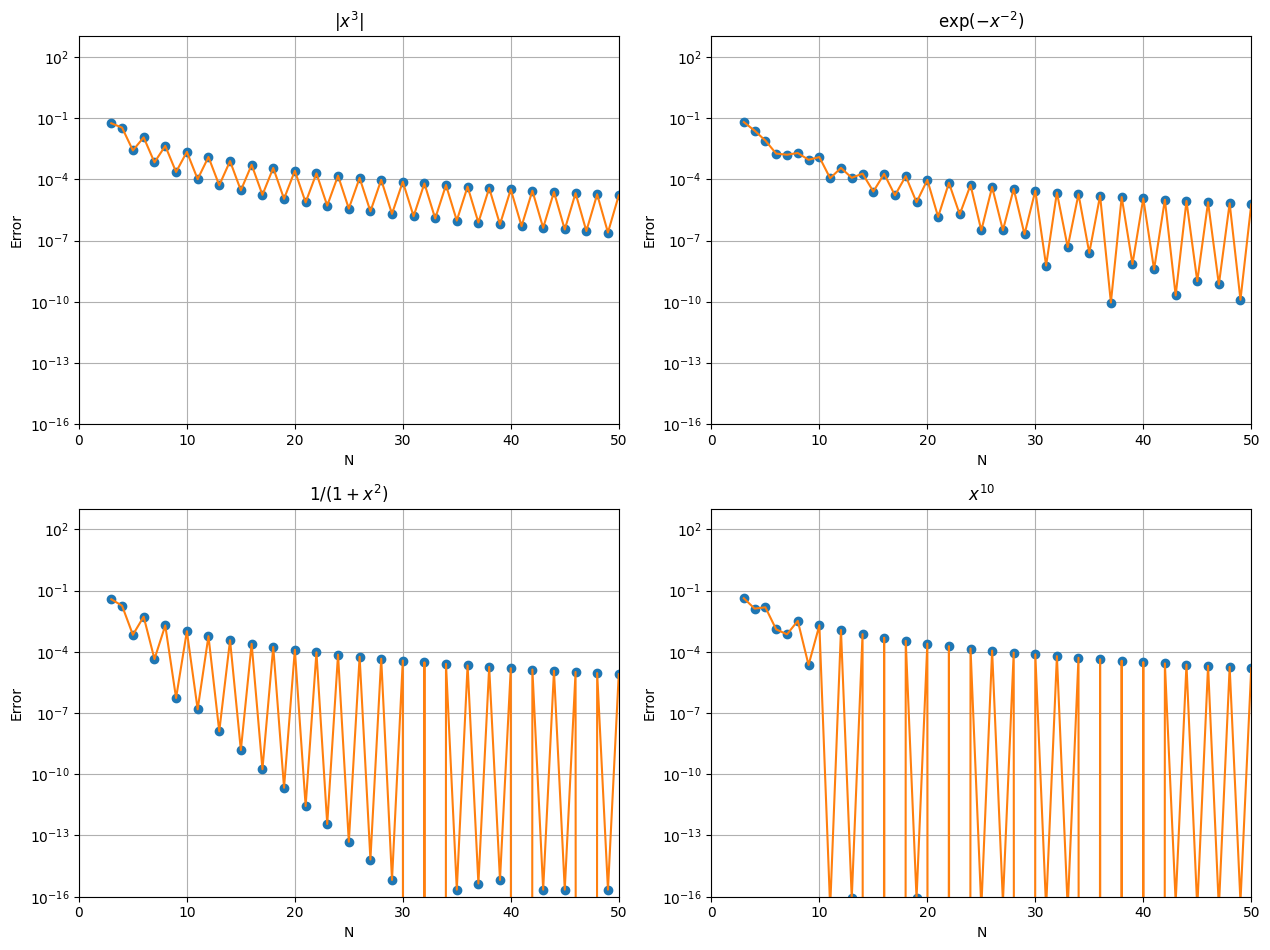

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

# Fungsi Clenshaw-Curtis untuk bobot dan titik kuadratur
def clencurt(N):
    if N == 0:
        x = np.array([1.0])
        w = np.array([2.0])
        return w, x

    theta = np.pi * np.arange(N + 1) / N
    x = np.cos(theta)

    w = np.zeros(N + 1)
    ii = np.arange(1, N)
    v = np.ones(N - 1)

    for k in range(1, N // 2 + 1):
        v -= 2 * np.cos(2 * k * theta[ii]) / (4 * k**2 - 1)

    w[0] = 1.0 / (N**2 - 1 + (N % 2))
    w[N] = w[0]
    w[ii] = 2.0 / N * v

    return w, x

# Komputasi error
N_max = 50
error = np.zeros((4, N_max - 2))
N_range = np.arange(3, N_max + 1)
for (i, N) in enumerate(N_range):
    w, x = clencurt(N)

    # 1. Fungsi dengan variasi terbatas (|x|^3)
    f = np.abs(x)**3
    f_int = 0.5
    error[0, i] = np.abs(np.dot(w, f) - f_int)

    # 2. Fungsi C∞: exp(-1/x^2)
    f = np.exp(-x**(-2))
    f_int = 2.0 * (np.exp(-1) + np.sqrt(np.pi) * (scipy.special.erf(1) - 1))
    error[1, i] = np.abs(np.dot(w, f) - f_int)

    # 3. Fungsi analitik: 1 / (1 + x^2)
    f = 1.0 / (1.0 + x**2)
    f_int = np.pi / 2.0
    error[2, i] = np.abs(np.dot(w, f) - f_int)

    # 4. Polinomial: x^10
    f = x**10
    f_int = 2.0 / 11.0
    error[3, i] = np.abs(np.dot(w, f) - f_int)

# Plotting error
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
titles = [r'$|x^3|$', r'$\exp(-x^{-2})$', r'$1 / (1 + x^2)$', r'$x^{10}$']

for (i, title) in enumerate(titles):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.semilogy(N_range, error[i, :], '.', markersize=12)
    ax.semilogy(N_range, error[i, :])
    ax.set_xlim((0, N_max))
    ax.set_ylim((1e-16, 1e3))
    ax.grid(True)
    ax.set_xlabel("N")
    ax.set_ylabel("Error")
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [36]:
def gauss(N):
    beta = 0.5 / numpy.sqrt(1.0 - (2.0 * numpy.arange(1, N))**(-2))
    T = numpy.diag(beta, 1) + numpy.diag(beta, -1)
    x, V = numpy.linalg.eig(T)
    i = numpy.argsort(x)
    x = x[i]
    w = 2.0 * V[0, i]**2
    return w, x

<>:32: SyntaxWarning: invalid escape sequence '\e'
<>:32: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2688\3072884163.py:32: SyntaxWarning: invalid escape sequence '\e'
  titles = ['$|x^3|$', '$\exp(-x^{-2})$', '$1 / (1 + x^2)$', '$x^10$']


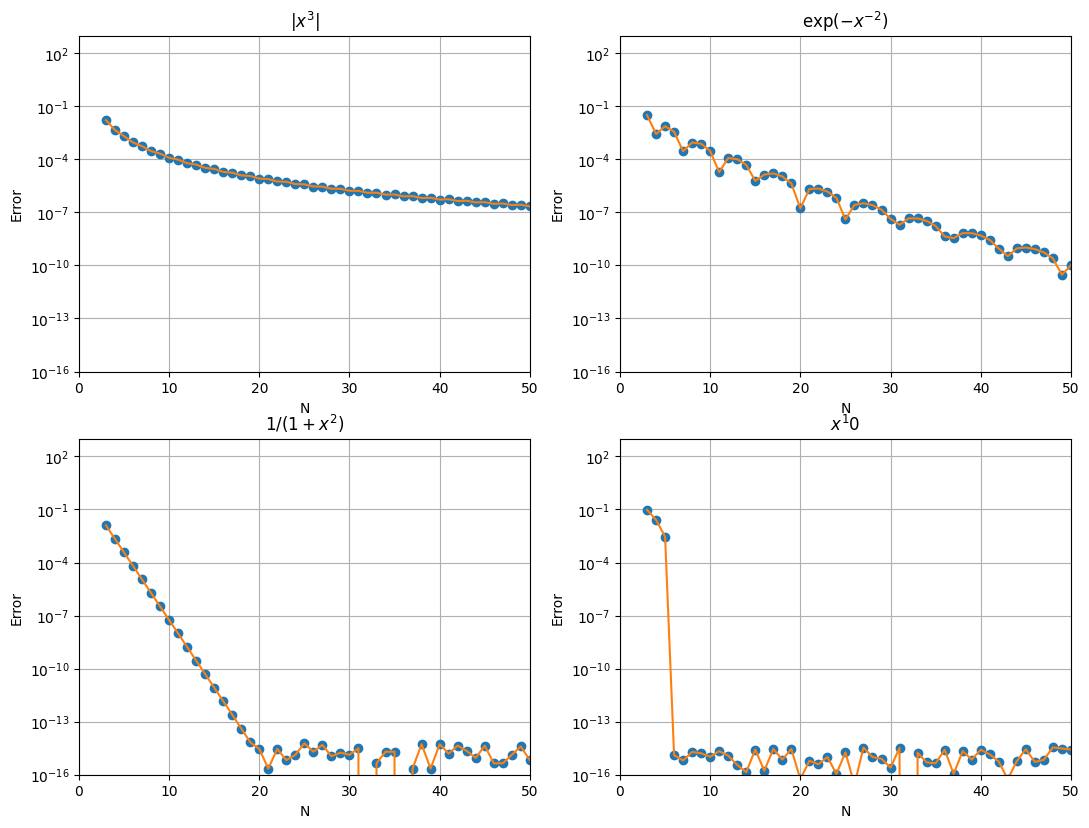

In [37]:
# Compare errors more carefully (program 30 in Trefethen)
#  Example using Gaussian quadrature (using Legendre points)
import scipy.special

N_max = 50
error = numpy.zeros((4, N_max - 2))
N_range = numpy.arange(3, N_max + 1)
for (i, N) in enumerate(N_range):
    w, x = gauss(N)
    
    # 3rd derivative of bounded variation
    f = numpy.abs(x)**3
    f_int = 0.5
    error[0, i] = numpy.abs(numpy.dot(w, f) - f_int)
    # C_\infty function
    f = numpy.exp(-x**(-2))
    f_int = 2.0 * (numpy.exp(-1) + numpy.sqrt(numpy.pi) * (scipy.special.erf(1) - 1))
    error[1, i] = numpy.abs(numpy.dot(w, f) - f_int)
    # Analytic on [-1, 1]
    f = 1.0 / (1.0 + x**2)
    f_int = numpy.pi / 2.0
    error[2, i] = numpy.abs(numpy.dot(w, f) - f_int)
    # Polynomial
    f = x**10
    f_int = 2.0 / 11.0
    error[3, i] = numpy.abs(numpy.dot(w, f) - f_int)
    
# Plot errors
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
titles = ['$|x^3|$', '$\exp(-x^{-2})$', '$1 / (1 + x^2)$', '$x^10$']
for (i, title) in enumerate(titles):
    axes = fig.add_subplot(2, 2, i + 1)
    axes.semilogy(N_range, error[i, :], '.', markersize=12)
    axes.semilogy(N_range, error[i, :])
    axes.set_xlim((0, N_max))
    axes.set_ylim((1e-16, 1e3))
    axes.grid(True)
    axes.set_xlabel("N")
    axes.set_ylabel("Error")
    axes.set_title(title)